Name: Burak Kutlu

ID: 201101073

Course: BIL470

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc

# Exploratory Data Analysis (EDA) for DDOS detection

In [36]:
csv_file = ""
df=pd.read_csv(csv_file)
df[' Label'] = df[' Label'].map({'BENIGN': 0, 'DDoS': 1})
df

Flow ID       Source IP   Source Port  \
0       192.168.10.5-104.16.207.165-54865-443-6  104.16.207.165           443   
1         192.168.10.5-104.16.28.216-55054-80-6   104.16.28.216            80   
2         192.168.10.5-104.16.28.216-55055-80-6   104.16.28.216            80   
3       192.168.10.16-104.17.241.25-46236-443-6   104.17.241.25           443   
4       192.168.10.5-104.19.196.102-54863-443-6  104.19.196.102           443   
...                                         ...             ...           ...   
225740     192.168.10.15-72.21.91.29-61374-80-6     72.21.91.29            80   
225741     192.168.10.15-72.21.91.29-61378-80-6     72.21.91.29            80   
225742     192.168.10.15-72.21.91.29-61375-80-6     72.21.91.29            80   
225743    192.168.10.15-8.41.222.187-61323-80-6    8.41.222.187            80   
225744      192.168.10.15-8.43.72.21-61326-80-6      8.43.72.21            80   

        Destination IP   Destination Port   Protocol      Timestamp  \
0         192.168.10.5              54865          6  7/7/2017 3:30   
1         192.168.10.5              55054          6  7/7/2017 3:30   
2         192.168.10.5              55055          6  7/7/2017 3:30   
3        192.168.10.16              46236          6  7/7/2017 3:30   
4         192.168.10.5              54863          6  7/7/2017 3:30   
...                ...                ...        ...            ...   
225740   192.168.10.15              61374          6  7/7/2017 5:02   
225741   192.168.10.15              61378          6  7/7/2017 5:02   
225742   192.168.10.15              61375          6  7/7/2017 5:02   
225743   192.168.10.15              61323          6  7/7/2017 5:02   
225744   192.168.10.15              61326          6  7/7/2017 5:02   

         Flow Duration   Total Fwd Packets   Total Backward Packets  ...  \
0                    3                   2                        0  ...   
1                  109                   1                        1  ...   
2                   52                   1                        1  ...   
3                   34                   1                        1  ...   
4                    3                   2                        0  ...   
...                ...                 ...                      ...  ...   
225740              61                   1                        1  ...   
225741              72                   1                        1  ...   
225742              75                   1                        1  ...   
225743              48                   2                        0  ...   
225744              68                   1                        1  ...   

         min_seg_size_forward  Active Mean   Active Std   Active Max  \
0                          20          0.0          0.0            0   
1                          20          0.0          0.0            0   
2                          20          0.0          0.0            0   
3                          20          0.0          0.0            0   
4                          20          0.0          0.0            0   
...                       ...          ...          ...          ...   
225740                     20          0.0          0.0            0   
225741                     20          0.0          0.0            0   
225742                     20          0.0          0.0            0   
225743                     20          0.0          0.0            0   
225744                     20          0.0          0.0            0   

         Active Min  Idle Mean   Idle Std   Idle Max   Idle Min   Label  
0                 0        0.0        0.0          0          0       0  
1                 0        0.0        0.0          0          0       0  
2                 0        0.0        0.0          0          0       0  
3                 0        0.0        0.0          0          0       0  
4                 0        0.0        0.0          0          0   

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225745 entries, 0 to 225744
Data columns (total 85 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Flow ID                       225745 non-null  object 
 1    Source IP                    225745 non-null  object 
 2    Source Port                  225745 non-null  int64  
 3    Destination IP               225745 non-null  object 
 4    Destination Port             225745 non-null  int64  
 5    Protocol                     225745 non-null  int64  
 6    Timestamp                    225745 non-null  object 
 7    Flow Duration                225745 non-null  int64  
 8    Total Fwd Packets            225745 non-null  int64  
 9    Total Backward Packets       225745 non-null  int64  
 10  Total Length of Fwd Packets   225745 non-null  int64  
 11   Total Length of Bwd Packets  225745 non-null  int64  
 12   Fwd Packet Length Max        225745 non-nul

In [38]:
df.columns
#df[' Label'].value_counts()

Index(['Flow ID', ' Source IP', ' Source Port', ' Destination IP',
       ' Destination Port', ' Protocol', ' Timestamp', ' Flow Duration',
       ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Pa

## Data Cleaning

### Missing Values

In [39]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Flow ID              0
 Source IP           0
 Source Port         0
 Destination IP      0
 Destination Port    0
                    ..
Idle Mean            0
 Idle Std            0
 Idle Max            0
 Idle Min            0
 Label               0
Length: 85, dtype: int64


In [40]:
# Iterate over columns with missing values
columns_with_missing_values = []
for column, count in missing_values.items():
    if count > 0:
        columns_with_missing_values.append(column)

# Print columns with missing values
print("Columns with Missing Values:")
for column in columns_with_missing_values:
    print(f"{column}: {missing_values[column]} missing values")

Columns with Missing Values:
Flow Bytes/s: 4 missing values


In [41]:
df = df.dropna()

### Duplicate values

In [42]:
# Duplicate Data in the Dataset
duplicate_rows = df[df.duplicated()]
print("Number of duplicate rows: ", duplicate_rows.shape[0])
print("\nDuplicate rows:\n", duplicate_rows)

df.drop_duplicates(inplace=True)
df.reset_index(inplace=True, drop=True)


Number of duplicate rows:  2

Duplicate rows:
                                          Flow ID      Source IP   Source Port  \
17644   192.168.10.25-192.168.10.50-53615-6756-6  192.168.10.25         53615   
59709  192.168.10.25-192.168.10.50-53631-20878-6  192.168.10.25         53631   

       Destination IP   Destination Port   Protocol      Timestamp  \
17644   192.168.10.50               6756          6  7/7/2017 3:53   
59709   192.168.10.50              20878          6  7/7/2017 4:00   

        Flow Duration   Total Fwd Packets   Total Backward Packets  ...  \
17644               1                   2                        0  ...   
59709               1                   2                        0  ...   

        min_seg_size_forward  Active Mean   Active Std   Active Max  \
17644                     32          0.0          0.0            0   
59709                     32          0.0          0.0            0   

        Active Min  Idle Mean   Idle Std   Idle Max   Idle

C:\Users\burak\AppData\Local\Temp\ipykernel_17656\1088121927.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


In [43]:
# count the number of unique values in each column
df.nunique().sort_values(ascending=True).head(25)

 CWE Flag Count             1
 Bwd URG Flags              1
Bwd Avg Bulk Rate           1
 Fwd URG Flags              1
 Bwd Avg Packets/Bulk       1
 Bwd PSH Flags              1
 Bwd Avg Bytes/Bulk         1
Fwd Avg Bytes/Bulk          1
 Fwd Avg Bulk Rate          1
 Fwd Avg Packets/Bulk       1
 ACK Flag Count             2
 PSH Flag Count             2
FIN Flag Count              2
 SYN Flag Count             2
 URG Flag Count             2
Fwd PSH Flags               2
 RST Flag Count             2
 ECE Flag Count             2
 Label                      2
 Protocol                   3
 Down/Up Ratio              8
 min_seg_size_forward       8
 Timestamp                 93
 Min Packet Length        109
 Fwd Packet Length Min    151
dtype: int64

In [44]:
one_value_cols = [col for col in df.columns if df[col].nunique() <= 1]
print("one_value_cols: ", one_value_cols)
df = df.drop(one_value_cols, axis=1)

one_value_cols:  [' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', ' CWE Flag Count', 'Fwd Avg Bytes/Bulk', ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate', ' Bwd Avg Bytes/Bulk', ' Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate']


In [45]:
"""three_value_cols = [col for col in df.columns if df[col].nunique() <= 3]
# One Hot Encoding
df = pd.get_dummies(df, columns=three_value_cols)"""

'three_value_cols = [col for col in df.columns if df[col].nunique() <= 3]\n# One Hot Encoding\ndf = pd.get_dummies(df, columns=three_value_cols)'

In [46]:
df

Flow ID       Source IP   Source Port  \
0       192.168.10.5-104.16.207.165-54865-443-6  104.16.207.165           443   
1         192.168.10.5-104.16.28.216-55054-80-6   104.16.28.216            80   
2         192.168.10.5-104.16.28.216-55055-80-6   104.16.28.216            80   
3       192.168.10.16-104.17.241.25-46236-443-6   104.17.241.25           443   
4       192.168.10.5-104.19.196.102-54863-443-6  104.19.196.102           443   
...                                         ...             ...           ...   
225734     192.168.10.15-72.21.91.29-61374-80-6     72.21.91.29            80   
225735     192.168.10.15-72.21.91.29-61378-80-6     72.21.91.29            80   
225736     192.168.10.15-72.21.91.29-61375-80-6     72.21.91.29            80   
225737    192.168.10.15-8.41.222.187-61323-80-6    8.41.222.187            80   
225738      192.168.10.15-8.43.72.21-61326-80-6      8.43.72.21            80   

        Destination IP   Destination Port   Protocol      Timestamp  \
0         192.168.10.5              54865          6  7/7/2017 3:30   
1         192.168.10.5              55054          6  7/7/2017 3:30   
2         192.168.10.5              55055          6  7/7/2017 3:30   
3        192.168.10.16              46236          6  7/7/2017 3:30   
4         192.168.10.5              54863          6  7/7/2017 3:30   
...                ...                ...        ...            ...   
225734   192.168.10.15              61374          6  7/7/2017 5:02   
225735   192.168.10.15              61378          6  7/7/2017 5:02   
225736   192.168.10.15              61375          6  7/7/2017 5:02   
225737   192.168.10.15              61323          6  7/7/2017 5:02   
225738   192.168.10.15              61326          6  7/7/2017 5:02   

         Flow Duration   Total Fwd Packets   Total Backward Packets  ...  \
0                    3                   2                        0  ...   
1                  109                   1                        1  ...   
2                   52                   1                        1  ...   
3                   34                   1                        1  ...   
4                    3                   2                        0  ...   
...                ...                 ...                      ...  ...   
225734              61                   1                        1  ...   
225735              72                   1                        1  ...   
225736              75                   1                        1  ...   
225737              48                   2                        0  ...   
225738              68                   1                        1  ...   

         min_seg_size_forward  Active Mean   Active Std   Active Max  \
0                          20          0.0          0.0            0   
1                          20          0.0          0.0            0   
2                          20          0.0          0.0            0   
3                          20          0.0          0.0            0   
4                          20          0.0          0.0            0   
...                       ...          ...          ...          ...   
225734                     20          0.0          0.0            0   
225735                     20          0.0          0.0            0   
225736                     20          0.0          0.0            0   
225737                     20          0.0          0.0            0   
225738                     20          0.0          0.0            0   

         Active Min  Idle Mean   Idle Std   Idle Max   Idle Min   Label  
0                 0        0.0        0.0          0          0       0  
1                 0        0.0        0.0          0          0       0  
2                 0        0.0        0.0          0          0       0  
3                 0        0.0        0.0          0          0       0  
4                 0        0.0        0.0          0          0   

## Data Preprocessing

### Deleting useless columns 

In [47]:
# Remove leading and trailing spaces from column names
df.columns = df.columns.str.strip()

In [48]:
# Drop the 'Flow ID' and 'Timestamp' columns
# Flow ID = destination IP + source IP + Destination Port + Source Port + Protocol
df = df.drop(['Flow ID', 'Timestamp'], axis=1)

In [49]:
"""print("df['Active Mean'].value_counts(): ", df['Active Mean'].value_counts())
print("df[' Active Std'].value_counts(): ", df['Active Std'].value_counts())
print("df[' Active Max'].value_counts(): ", df['Active Max'].value_counts())
print("df[' Active Min'].value_counts(): ", df['Active Min'].value_counts())
print("df['Idle Mean'].value_counts(): ", df['Idle Mean'].value_counts())
print("df[' Idle Std'].value_counts(): ", df['Idle Std'].value_counts())
print("df[' Idle Max'].value_counts(): ", df['Idle Max'].value_counts())
print("df[' Idle Min'].value_counts(): ", df['Idle Min'].value_counts())"""
df

Source IP  Source Port Destination IP  Destination Port  \
0       104.16.207.165          443   192.168.10.5             54865   
1        104.16.28.216           80   192.168.10.5             55054   
2        104.16.28.216           80   192.168.10.5             55055   
3        104.17.241.25          443  192.168.10.16             46236   
4       104.19.196.102          443   192.168.10.5             54863   
...                ...          ...            ...               ...   
225734     72.21.91.29           80  192.168.10.15             61374   
225735     72.21.91.29           80  192.168.10.15             61378   
225736     72.21.91.29           80  192.168.10.15             61375   
225737    8.41.222.187           80  192.168.10.15             61323   
225738      8.43.72.21           80  192.168.10.15             61326   

        Protocol  Flow Duration  Total Fwd Packets  Total Backward Packets  \
0              6              3                  2                       0   
1              6            109                  1                       1   
2              6             52                  1                       1   
3              6             34                  1                       1   
4              6              3                  2                       0   
...          ...            ...                ...                     ...   
225734         6             61                  1                       1   
225735         6             72                  1                       1   
225736         6             75                  1                       1   
225737         6             48                  2                       0   
225738         6             68                  1                       1   

        Total Length of Fwd Packets  Total Length of Bwd Packets  ...  \
0                                12                            0  ...   
1                                 6                            6  ...   
2                                 6                            6  ...   
3                                 6                            6  ...   
4                                12                            0  ...   
...                             ...                          ...  ...   
225734                            6                            6  ...   
225735                            6                            6  ...   
225736                            6                            6  ...   
225737                           12                            0  ...   
225738                            6                            6  ...   

        min_seg_size_forward  Active Mean  Active Std  Active Max  Active Min  \
0                         20          0.0         0.0           0           0   
1                         20          0.0         0.0           0           0   
2                         20          0.0         0.0           0           0   
3                         20          0.0         0.0           0           0   
4                         20          0.0         0.0           0           0   
...                      ...          ...         ...         ...         ...   
225734                    20          0.0         0.0           0           0   
225735                    20          0.0         0.0           0           0   
225736                    20          0.0         0.0           0           0   
225737                    20          0.0         0.0           0           0   
225738                    20          0.0         0.0           0           0   

        Idle Mean  Idle Std  Idle Max  Idle Min  Label  
0             0.0       0.0         0         0      0  
1             0.0       0.0         0         0      0  
2             0.0       0.0         0         0      0  
3             0.0       0.0         0         0      0  
4             0.0       0.0         0         0      0  
...           ...  

In [50]:
#Columns where all entries have the same value and mostly zero
columns = ['Active Mean', 'Active Std', 'Active Max', 'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min']
df.drop(columns, axis=1, inplace=True)

In [51]:
df.columns

Index(['Source IP', 'Source Port', 'Destination IP', 'Destination Port',
       'Protocol', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN 

### Transform 

In [52]:
# Initialize the label encoder
label_encoder = LabelEncoder()

# Encode the 'Source IP' column
df['Source IP'] = label_encoder.fit_transform(df['Source IP'])

# Encode the 'Destination IP' column
df['Destination IP'] = label_encoder.fit_transform(df['Destination IP'])

# Encode the 'Label' column (assuming 'DDoS' is 1 and 'Benign' is 0)
df['Label'] = label_encoder.fit_transform(df['Label'])

In [53]:
# dropped all columns that have 0 standard deviation

df = df.loc[:, df.std() != 0]

C:\Users\burak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


### High Correlation

In [54]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
corr_matrix=df[numerical_features].corr()

perfect_corr = np.where(np.isclose(corr_matrix, 1.0, atol=1e-8) | np.isclose(corr_matrix, -1.0, atol=1e-8))
perfect_corr_pairs = [(corr_matrix.index[x], corr_matrix.columns[y]) for x, y in zip(*perfect_corr) if x != y]

perfect_corr_pairs_set = set(tuple(sorted(pair)) for pair in perfect_corr_pairs)

perfect_corr_pairs_list = list(perfect_corr_pairs_set)

for pair in perfect_corr_pairs_list:
    print(pair)

('Subflow Fwd Packets', 'Total Fwd Packets')
('Avg Bwd Segment Size', 'Bwd Packet Length Mean')
('Fwd Header Length', 'Fwd Header Length.1')
('Avg Fwd Segment Size', 'Fwd Packet Length Mean')
('Subflow Bwd Packets', 'Total Backward Packets')
('Fwd PSH Flags', 'SYN Flag Count')
('ECE Flag Count', 'RST Flag Count')
('Subflow Fwd Bytes', 'Total Length of Fwd Packets')
('Subflow Bwd Bytes', 'Total Length of Bwd Packets')


In [55]:
df.drop('Subflow Bwd Packets',axis=1,inplace=True)
df.drop('Subflow Fwd Packets',axis=1,inplace=True)
df.drop('Avg Fwd Segment Size',axis=1,inplace=True)
df.drop('Avg Bwd Segment Size',axis=1,inplace=True)
df.drop('Subflow Bwd Bytes',axis=1,inplace=True)
df.drop('SYN Flag Count',axis=1,inplace=True)
df.drop('Fwd Header Length',axis=1,inplace=True)
df.drop('ECE Flag Count',axis=1,inplace=True)
df.drop('Subflow Fwd Bytes',axis=1,inplace=True)

### Balance the labels

In [56]:
df['Label'].value_counts()

Label
1    128027
0     97712
Name: count, dtype: int64

In [57]:
# As the dataset is imbalanced, we will balance it by taking 3000 samples from each class
balanced = pd.DataFrame()
balanced = pd.concat([balanced, df[df['Label'] == 0].sample(n=90000)])
balanced = pd.concat([balanced, df[df['Label'] == 1].sample(n=90000)])
df = balanced.copy()
# free up memory
del balanced

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180000 entries, 13775 to 67798
Data columns (total 56 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Source IP                    180000 non-null  int32  
 1   Source Port                  180000 non-null  int64  
 2   Destination IP               180000 non-null  int32  
 3   Destination Port             180000 non-null  int64  
 4   Protocol                     180000 non-null  int64  
 5   Flow Duration                180000 non-null  int64  
 6   Total Fwd Packets            180000 non-null  int64  
 7   Total Backward Packets       180000 non-null  int64  
 8   Total Length of Fwd Packets  180000 non-null  int64  
 9   Total Length of Bwd Packets  180000 non-null  int64  
 10  Fwd Packet Length Max        180000 non-null  int64  
 11  Fwd Packet Length Min        180000 non-null  int64  
 12  Fwd Packet Length Mean       180000 non-null  float64
 13  F

In [59]:
df.columns

Index(['Source IP', 'Source Port', 'Destination IP', 'Destination Port',
       'Protocol', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd Header Length',
       'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length',
       'Max Packet Length', 'Packet Length Mean', 'Packet Length Std',
       'Packet Length Variance', 'FIN Flag Count', 'RST Flag Count',
       'PSH Fla

## Data summary

In [60]:
# Summary statistics for numeric columns
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
           Source IP    Source Port  Destination IP  Destination Port  \
count  180000.000000  180000.000000   180000.000000     180000.000000   
mean      575.204228   37026.889544      860.593744      10244.758756   
std       201.332972   23802.484707      322.847438      20897.193162   
min         0.000000       0.000000        0.000000          0.000000   
25%       426.000000   15141.750000      857.000000         80.000000   
50%       426.000000   49243.000000      867.000000         80.000000   
75%       702.000000   58213.000000      867.000000        443.000000   
max      2066.000000   65534.000000     2553.000000      65532.000000   

            Protocol  Flow Duration  Total Fwd Packets  \
count  180000.000000   1.800000e+05      180000.000000   
mean        7.849756   1.610265e+07           4.947072   
std         4.117541   3.157699e+07          16.933979   
min         0.000000  -1.000000e+00           1.000000   
25%         6.000000   5.785850

C:\Users\burak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
C:\Users\burak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


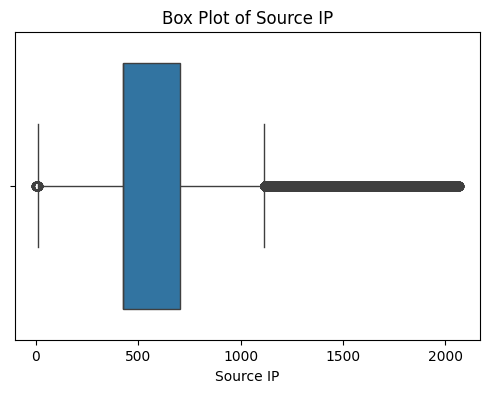

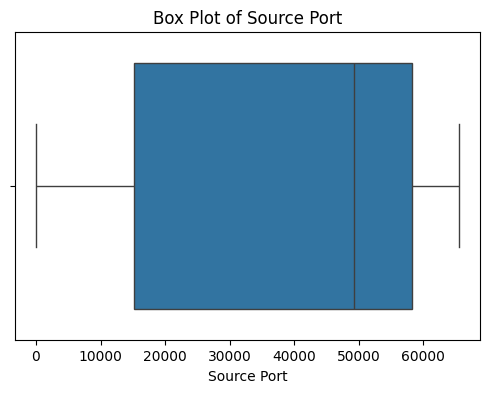

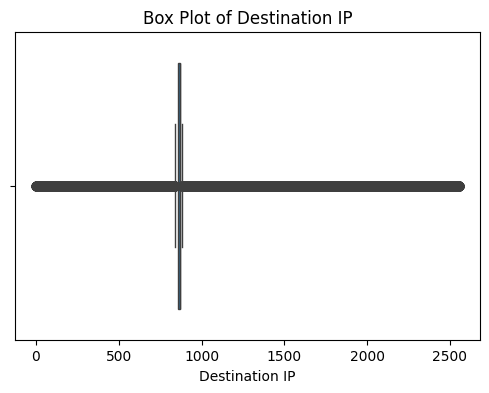

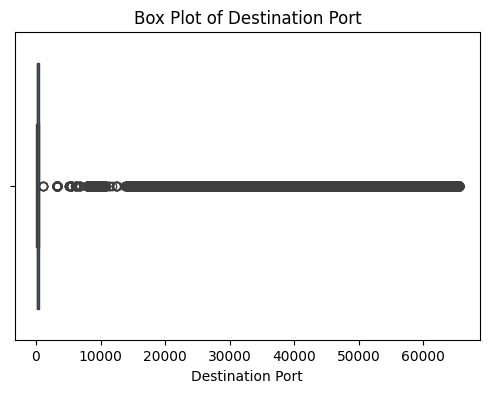

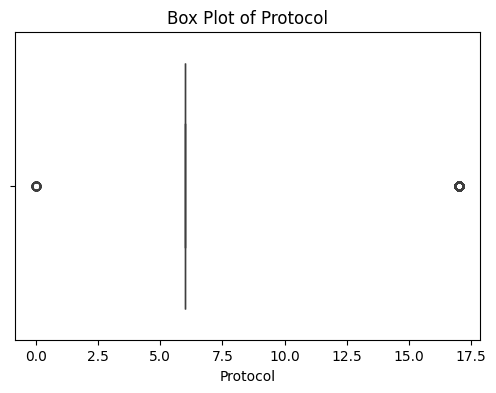

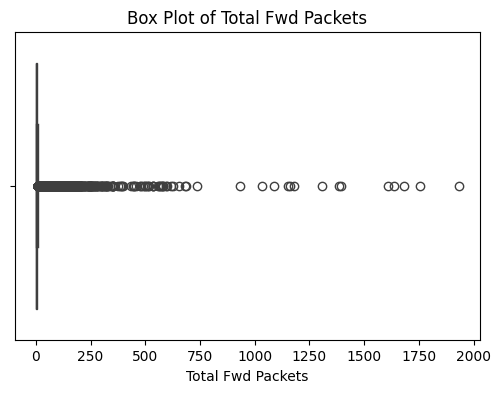

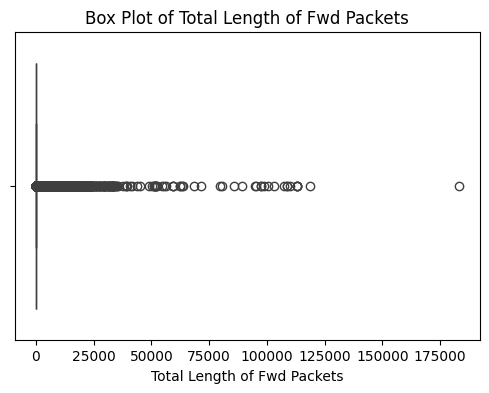

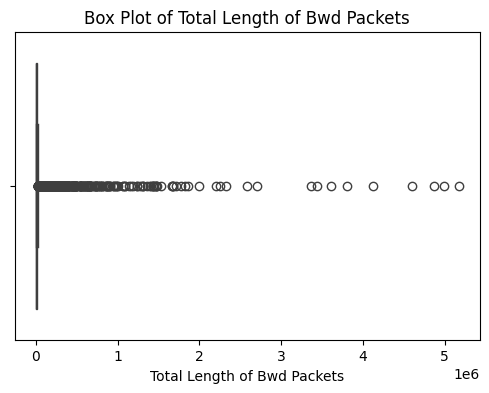

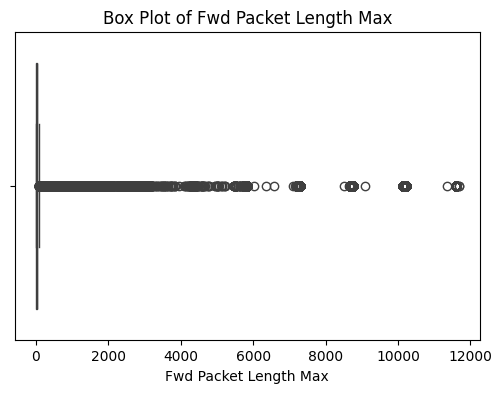

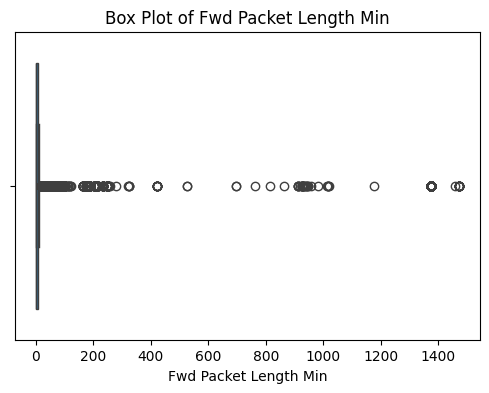

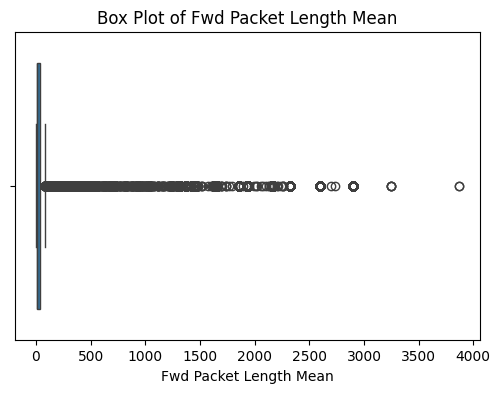

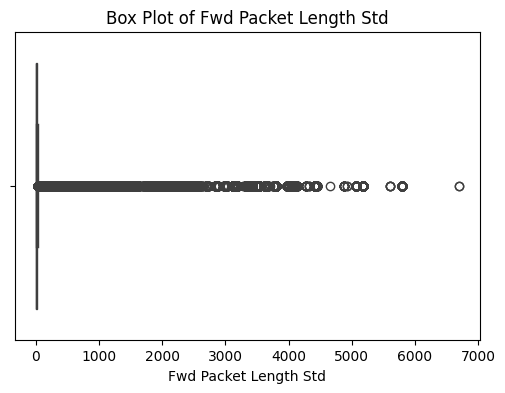

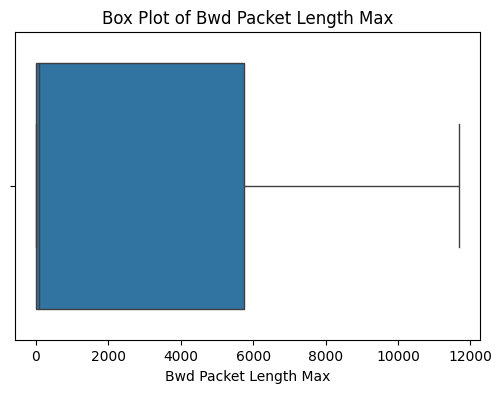

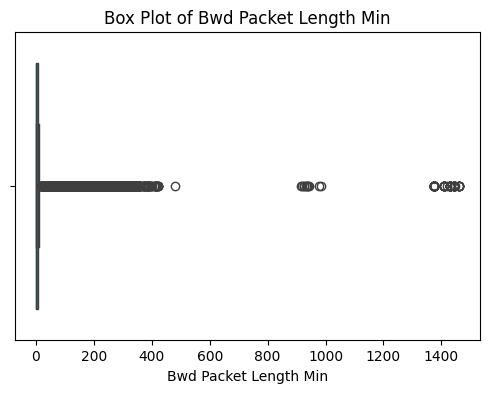

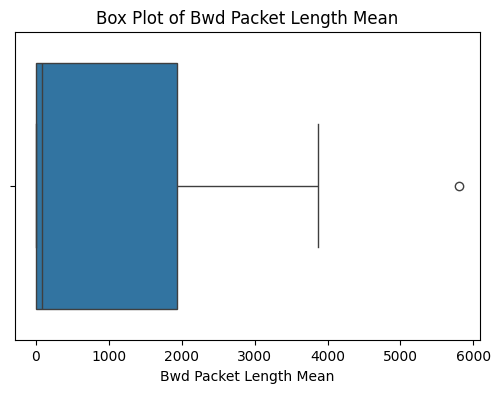

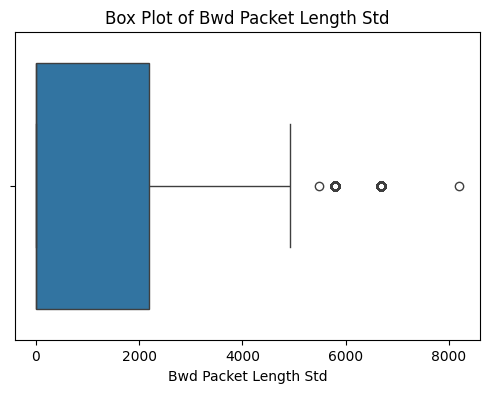

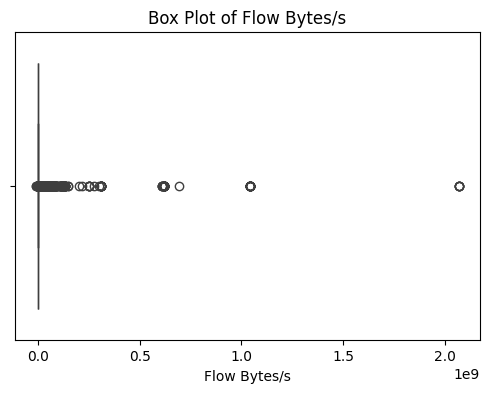

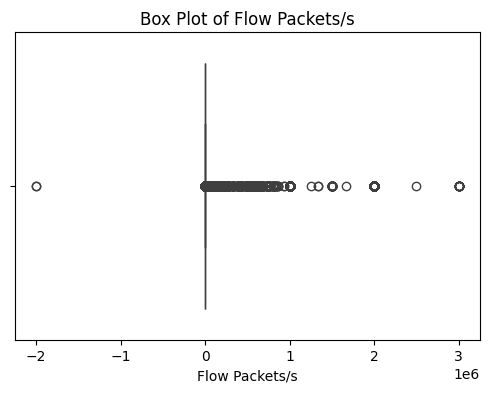

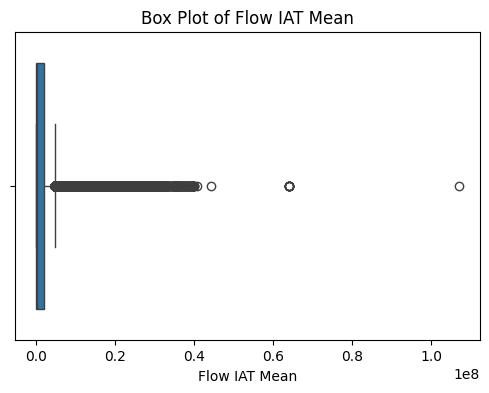

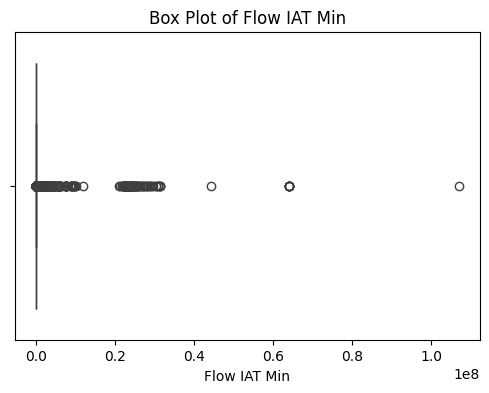

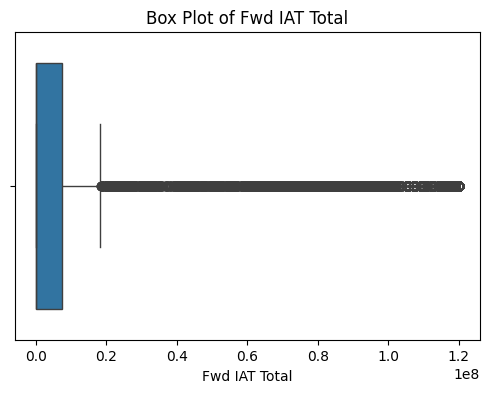

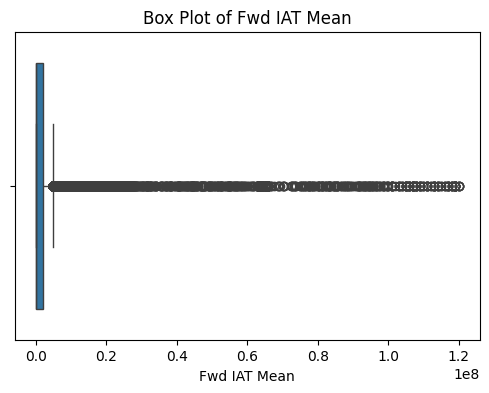

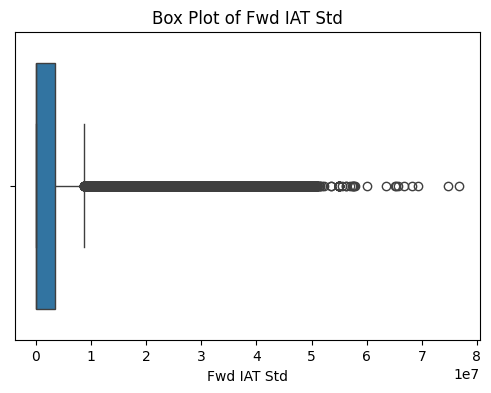

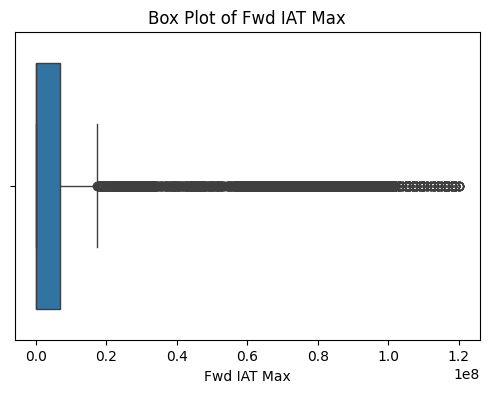

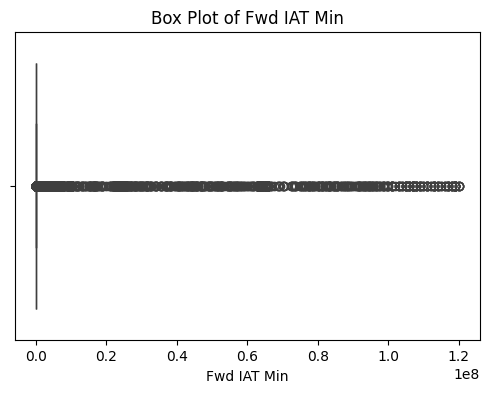

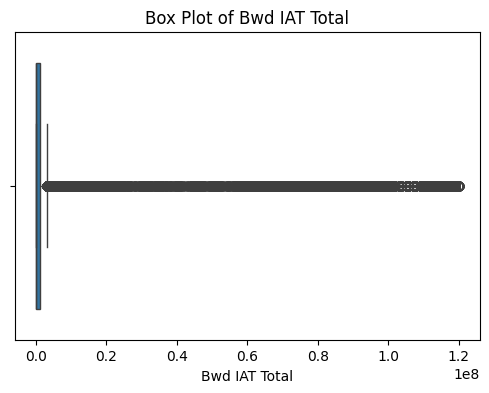

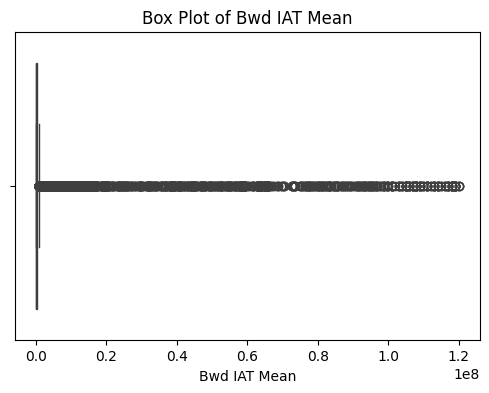

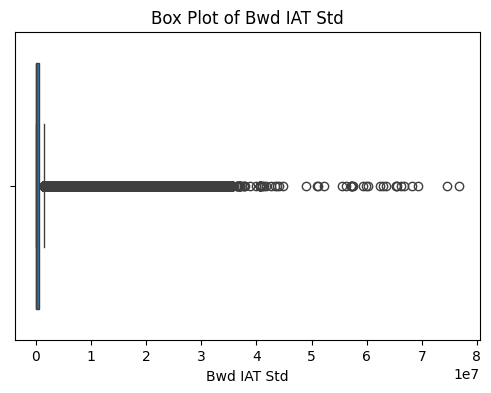

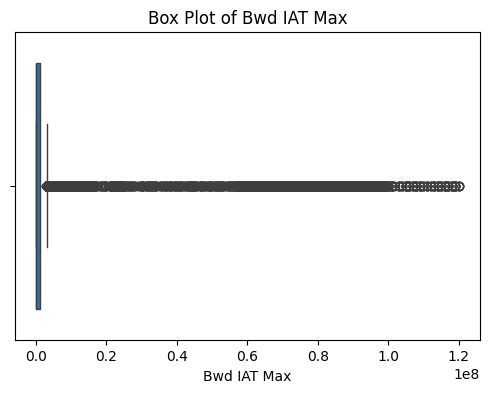

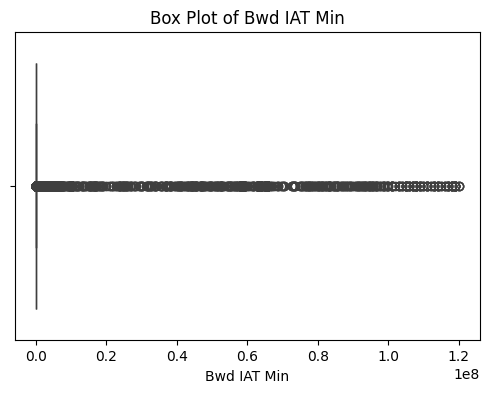

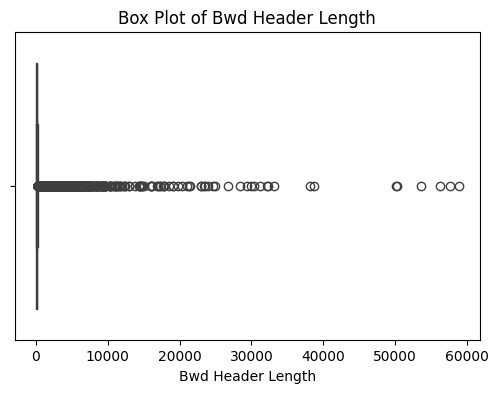

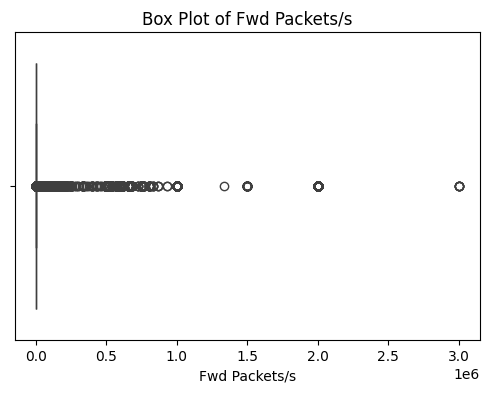

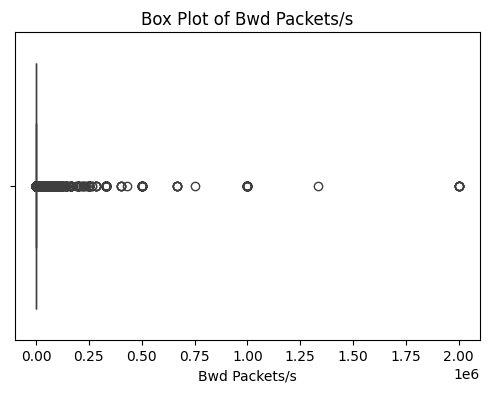

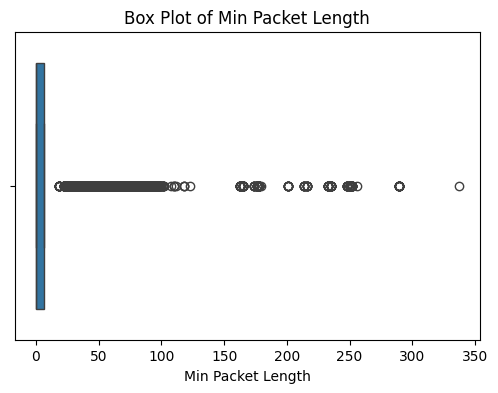

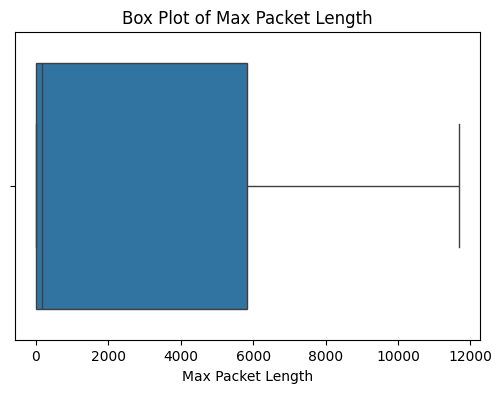

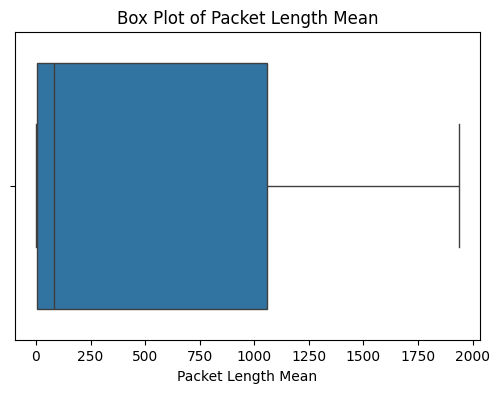

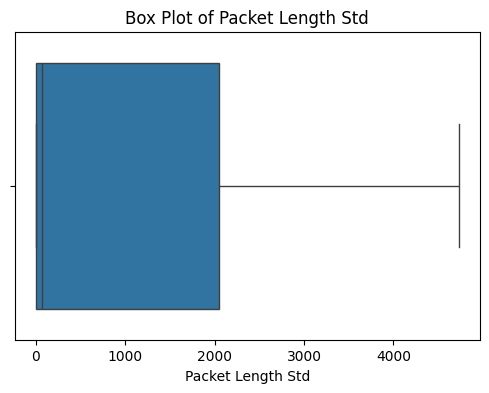

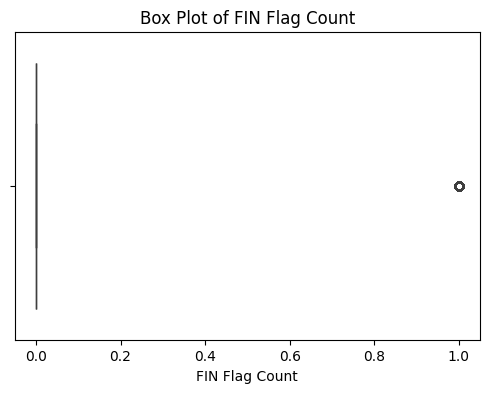

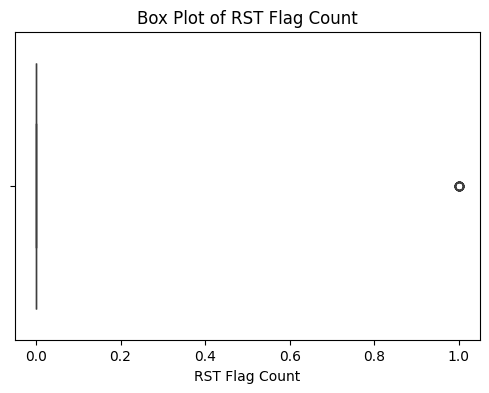

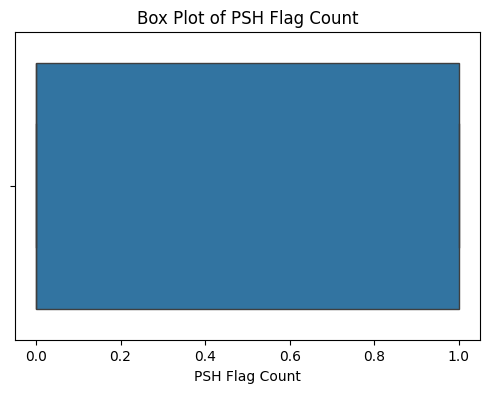

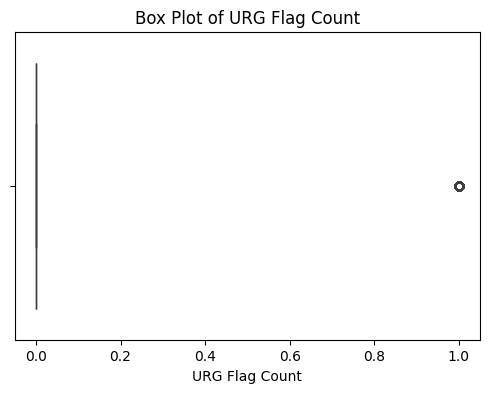

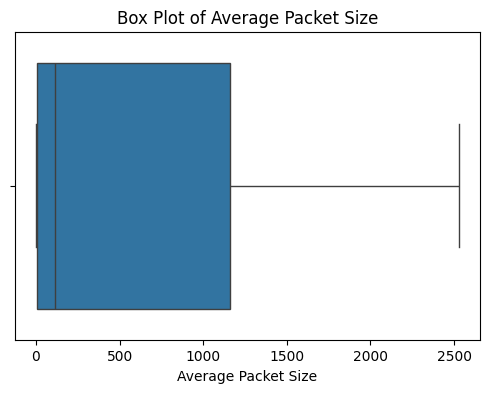

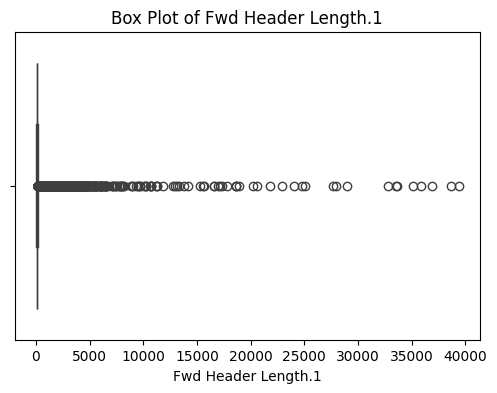

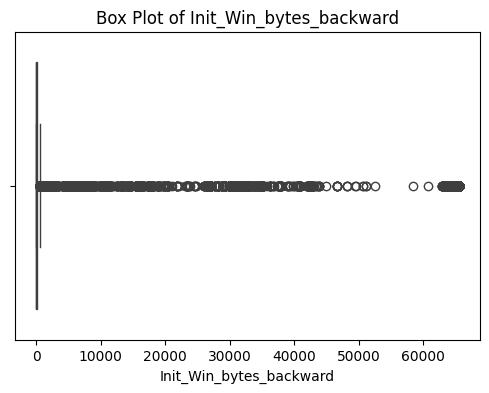

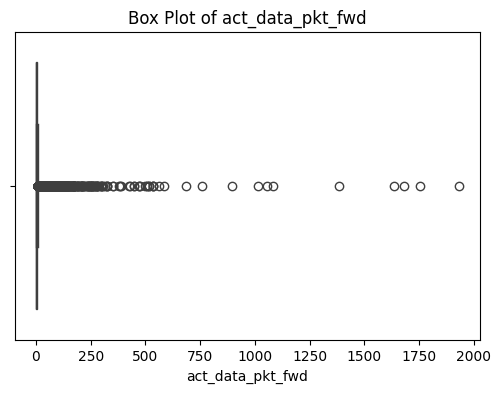

In [61]:
# Box plots for numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x=col)
    plt.title(f'Box Plot of {col}')
    plt.show()

In [62]:
df.columns

Index(['Source IP', 'Source Port', 'Destination IP', 'Destination Port',
       'Protocol', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd Header Length',
       'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length',
       'Max Packet Length', 'Packet Length Mean', 'Packet Length Std',
       'Packet Length Variance', 'FIN Flag Count', 'RST Flag Count',
       'PSH Fla

# Data visualization

### Flow Duration

In [63]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

sns.histplot(df[df['Label'] == 0]['Flow Duration'], ax=ax[0], color='r', kde=True)
ax[0].set_title('Benign')

sns.histplot(df[df['Label'] == 1]['Flow Duration'], ax=ax[1], color='b', kde=True)
ax[1].set_title('DDoS')

plt.show()

### Total Fwd Packets

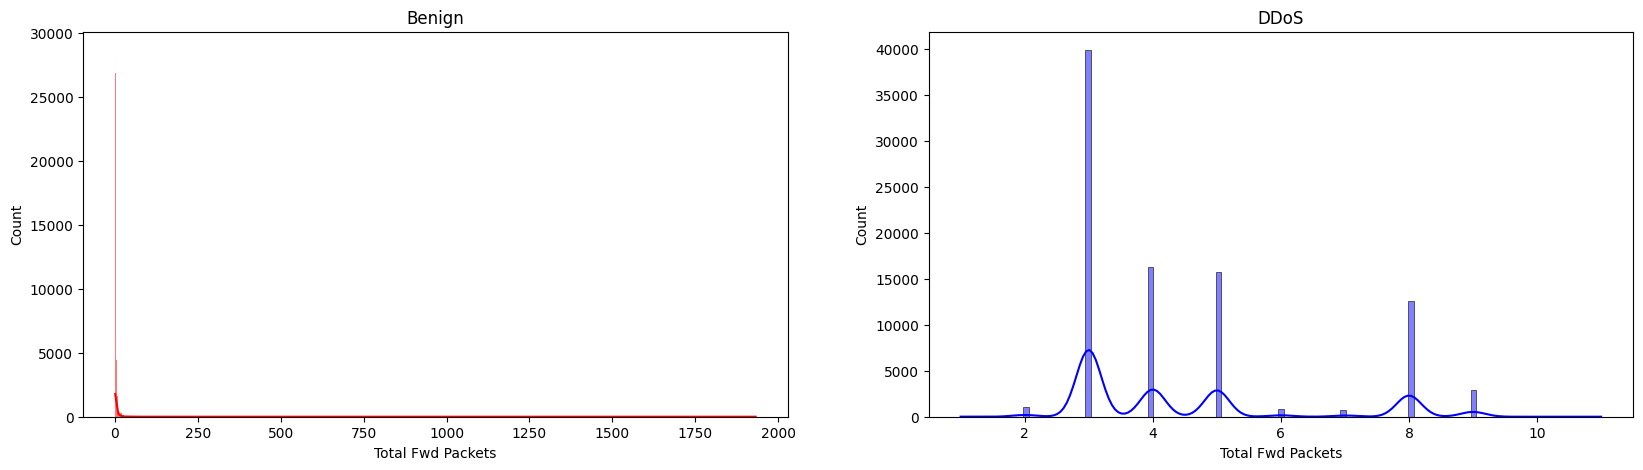

In [64]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

sns.histplot(df[df['Label'] == 0]['Total Fwd Packets'], ax=ax[0], color='r', kde=True)
ax[0].set_title('Benign')

sns.histplot(df[df['Label'] == 1]['Total Fwd Packets'], ax=ax[1], color='b', kde=True)
ax[1].set_title('DDoS')

plt.show()

### Total Backward Packets

In [65]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

sns.histplot(df[df['Label'] == 0]['Total Backward Packets'], ax=ax[0], color='r', kde=True)
ax[0].set_title('Benign')

sns.histplot(df[df['Label'] == 1]['Total Backward Packets'], ax=ax[1], color='b', kde=True)
ax[1].set_title('DDoS')

plt.show()

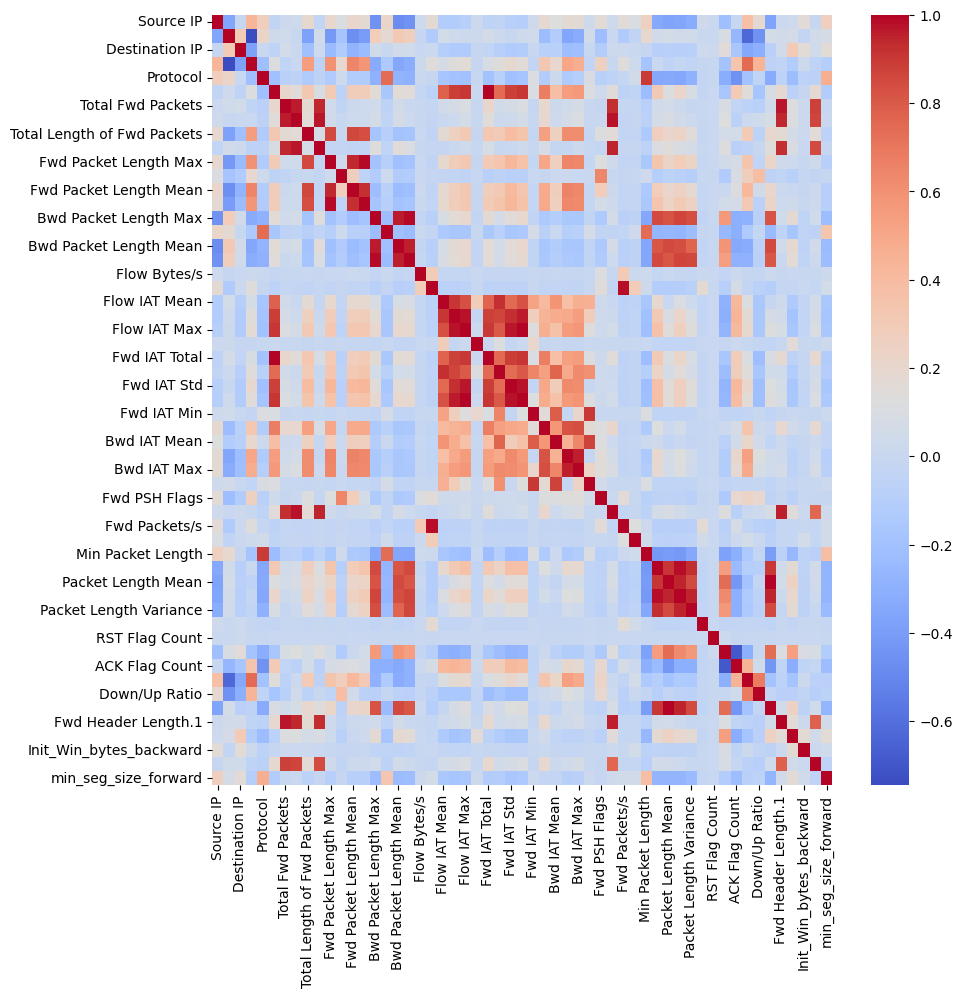

In [66]:
# Plot the correlation matrix
corr = df.drop('Label', axis=1).corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.show()

# Principal component analysis (PCA)

In [67]:
# we standardize the features
from sklearn.preprocessing import StandardScaler
df.reset_index(inplace=True, drop=True)
# separate the features from the labels
X = df.drop('Label', axis=1)
y = df['Label']
X = np.nan_to_num(X, nan=0.0, posinf=1e6, neginf=-1e6)  # Replace NaN with 0.0, +inf with 1e6, -inf with -1e6

# standardize the features
X = StandardScaler().fit_transform(X)

In [68]:
# find the optimal number of components
from sklearn.decomposition import PCA
df_pca = PCA().fit(X)
plt.plot(np.cumsum(df_pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('Explained variance vs number of components')
plt.show()

In [69]:
pca = PCA(n_components=20)
principalComponents = pca.fit_transform(X)
# create a dataframe with the principal components
df_pca = pd.DataFrame(data=principalComponents, columns=['PC' + str(i) for i in range(1, 21)])

# concatenate the labels to the dataframe
df_pca = pd.concat([df_pca, df[['Label']]], axis=1)

# print the first 5 rows of the dataframe
df_pca.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -3.199565 -1.888546  0.487976  1.038073 -2.399721 -1.684891 -0.077330   
1 -2.936159 -1.574796  0.294855  0.954148 -1.784007 -1.320942 -0.247637   
2 -1.816647  0.462352  1.437526 -0.430548 -0.935150 -0.205316  0.593347   
3 -3.146870 -1.830960  0.480512  1.017161 -2.187862 -1.575753  0.004586   
4 -1.760285 -2.044526 -0.120446 -1.036621  1.433958  1.011161  0.144978   

        PC8       PC9      PC10  ...      PC12      PC13      PC14      PC15  \
0 -1.556576  0.618078 -0.151426  ...  0.046991 -0.053250 -0.022885  0.160891   
1 -1.327788 -0.181682 -0.079992  ...  0.171832  0.167473  0.031754  0.142372   
2  1.988197  1.337489  0.156899  ... -0.750229 -0.047547 -0.064257  0.377740   
3 -1.330808  0.606099 -0.150374  ...  0.067290 -0.033215 -0.031433  0.260243   
4  0.919935  0.174948 -1.066863  ...  0.324695 -0.164158 -0.047045  0.696657   

       PC16      PC17      PC18      PC19      PC20  Label  
0 -0.349240  0.444142 -0.556553 -0.470826  0.132755      0  
1  0.819964 -0.492665  0.656643  0.576069 -0.320705      0  
2 -1.163433  0.905608 -2.478023  0.932690  0.233910      0  
3 -0.364219  0.495253 -0.639898 -0.462050  0.247531      0  
4 -0.186895  0.739956  0.268808  0.134430 -0.348338      0  

[5 rows x 21 columns]

In [70]:
# plot 
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('PC1', fontsize=15)
ax.set_ylabel('PC2', fontsize=15)
ax.set_title('2 component PCA', fontsize=20)
targets = [0, 1]
target_names = ['Benign', 'DDos']
colors = ['r', 'b']
for target, color in zip(targets, colors):
    indicesToKeep = df_pca['Label'] == target
    ax.scatter(df_pca.loc[indicesToKeep, 'PC1'], df_pca.loc[indicesToKeep, 'PC2'], c=color, s=50 , alpha=0.5)

ax.legend(target_names)
ax.grid()
plt.show()


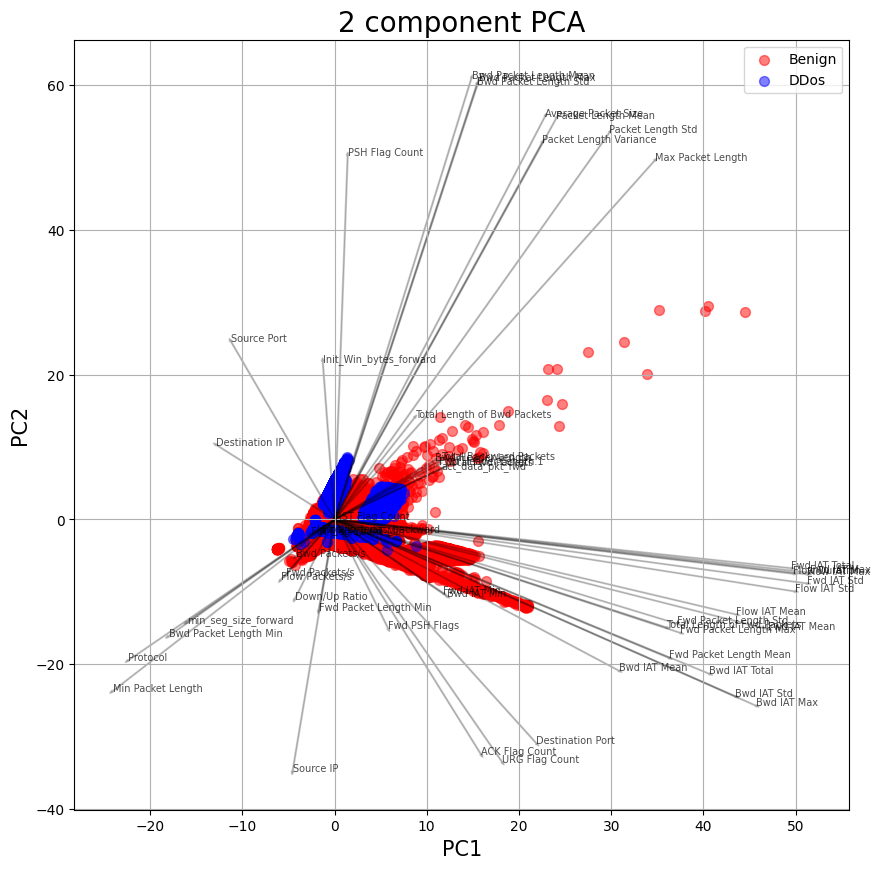

In [71]:
# plot 
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('PC1', fontsize=15)
ax.set_ylabel('PC2', fontsize=15)
ax.set_title('2 component PCA', fontsize=20)
targets = [0, 1]
target_names = ['Benign', 'DDos']
colors = ['r', 'b', 'g', 'y']
for target, color in zip(targets, colors):
    indicesToKeep = df_pca['Label'] == target
    ax.scatter(df_pca.loc[indicesToKeep, 'PC1'], df_pca.loc[indicesToKeep, 'PC2'], c=color, s=50 , alpha=0.5)
for i, txt in enumerate(df.drop('Label', axis=1).columns):
    plt.arrow(0, 0, 200*pca.components_[0][i], 200*pca.components_[1][i], color='black', alpha=0.2, head_width=0.3, width=.1)
    plt.annotate(txt, (200*pca.components_[0][i], 200*pca.components_[1][i]), size=7, alpha=0.7)

ax.legend(target_names)
ax.grid()
plt.show()

In [39]:
df_pca

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0       -2.981301 -1.642738  0.302882  0.935812 -2.025190 -1.426357 -0.554035   
1       10.948571 -3.785845 -1.296412 -4.675275 -1.792238 -2.221434  0.216361   
2       -3.109141 -1.778000  0.652478  1.111101 -2.391792 -1.846518 -0.154543   
3       -2.953617 -2.005436  0.403754  0.376624 -1.842260 -1.154581 -0.266720   
4       -3.037457 -1.811333  0.451478  0.796745 -1.997419 -1.404864 -0.265270   
...           ...       ...       ...       ...       ...       ...       ...   
179995  -0.957253 -1.315031  0.065594  1.651385  1.328049 -0.294340 -0.165544   
179996  -1.571956 -1.162604  0.132235  1.239087  1.196558 -0.280916 -0.176614   
179997  -0.363013  3.850348 -0.448054 -0.880768 -0.376099  0.707274 -0.220773   
179998  -0.782091  2.959334 -0.227342 -0.810858 -0.286842  0.665543 -0.229763   
179999  -1.534804 -1.375859  0.006637  0.728467  1.309861  0.006067 -0.187401   

             PC8       PC9      PC10  ...      PC12      PC13      PC14  \
0      -1.500367 -0.193908 -0.017446  ...  0.014251  0.123467  0.055208   
1       0.172196 -1.460085 -0.007383  ...  0.397868 -0.094231 -0.016188   
2      -1.250392  0.458481  0.089517  ... -0.045808 -0.113732 -0.029326   
3      -1.068067  0.504281 -0.369364  ... -0.124662 -0.226212 -0.012153   
4      -1.061529  0.556884 -0.148385  ... -0.153661 -0.115116 -0.010695   
...          ...       ...       ...  ...       ...       ...       ...   
179995  0.958854 -1.083620  0.749716  ... -0.017465  0.003651 -0.046323   
179996  1.035080 -1.167299  0.745387  ... -0.063793  0.038096 -0.053993   
179997  0.009324  0.149868 -0.372367  ... -0.349811  0.141417  0.034439   
179998  0.376436  0.092841 -0.249947  ... -0.461129  0.184058  0.043406   
179999  0.998089 -1.220826  0.470973  ... -0.029118 -0.088685 -0.054599   

            PC15      PC16      PC17      PC18      PC19      PC20  Label  
0      -0.234208  0.657238 -0.656224  0.751820  0.570594 -0.395715      0  
1      -0.192685 -0.094822  0.467862  0.428914 -0.936544 -0.689718      0  
2      -0.132497 -0.582122  0.284564 -0.527521 -0.502311  0.435047      0  
3      -0.216709 -0.919292  0.448747 -0.574621 -0.524551  0.514193      0  
4      -0.122936 -0.679713  0.417751 -0.643328 -0.502186  0.375965      0  
...          ...       ...       ...       ...       ...       ...    ...  
179995  0.268767  0.270827 -0.062025 -0.237104 -0.178146 -0.100709      1  
179996  0.350277  0.345247 -0.117700 -0.213224 -0.340918  0.028899      1  
179997  0.157671  0.228219 -0.130663 -0.120150  0.010197 -0.258934      1  
179998  0.244751  0.357710 -0.158111 -0.316709  0.345712 -0.538391      1  
179999  0.229716  0.077082 -0.091251 -0.102158 -0.377409  0.161872      1  

[180000 rows x 21 columns]

# t-Distributed Stochastic Neighbor Embedding (t-SNE)

In [ ]:
from sklearn.manifold import TSNE

# scatter plot the data
def plot_tsne(df_tsne):
    sns.scatterplot(x='PC1', y='PC2', hue='Label', data=df_tsne)
    plt.show()

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 180000 samples in 0.053s...
[t-SNE] Computed neighbors for 180000 samples in 36.240s...
[t-SNE] Computed conditional probabilities for sample 1000 / 180000
[t-SNE] Computed conditional probabilities for sample 2000 / 180000
[t-SNE] Computed conditional probabilities for sample 3000 / 180000
[t-SNE] Computed conditional probabilities for sample 4000 / 180000
[t-SNE] Computed conditional probabilities for sample 5000 / 180000
[t-SNE] Computed conditional probabilities for sample 6000 / 180000
[t-SNE] Computed conditional probabilities for sample 7000 / 180000
[t-SNE] Computed conditional probabilities for sample 8000 / 180000
[t-SNE] Computed conditional probabilities for sample 9000 / 180000
[t-SNE] Computed conditional probabilities for sample 10000 / 180000
[t-SNE] Computed conditional probabilities for sample 11000 / 180000
[t-SNE] Computed conditional probabilities for sample 12000 / 180000
[t-SNE] Computed conditional probab

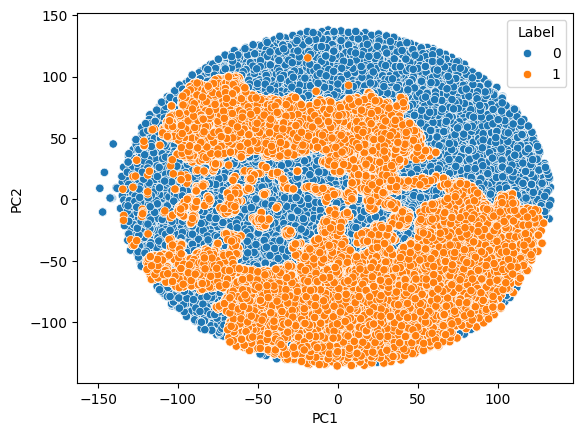

In [ ]:

asd = df.drop('Label', axis=1)
asd = np.nan_to_num(asd, nan=0.0, posinf=1e6, neginf=-1e6)  # Replace NaN with 0.0, +inf with 1e6, -inf with -1e6
tsne = TSNE(n_components=2, verbose=1, random_state=123, perplexity=5)
df_tsne = pd.DataFrame(tsne.fit_transform(asd), columns=['PC1', 'PC2'])
df_tsne['Label'] = df['Label'].values
plot_tsne(df_tsne)

In [ ]:
tsne = TSNE(n_components=2, verbose=1, random_state=123, perplexity=100)
df_tsne = pd.DataFrame(tsne.fit_transform(asd), columns=['PC1', 'PC2'])
df_tsne['Label'] = df['Label'].values
plot_tsne(df_tsne)

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 180000 samples in 0.045s...
[t-SNE] Computed neighbors for 180000 samples in 43.580s...
[t-SNE] Computed conditional probabilities for sample 1000 / 180000
[t-SNE] Computed conditional probabilities for sample 2000 / 180000
[t-SNE] Computed conditional probabilities for sample 3000 / 180000
[t-SNE] Computed conditional probabilities for sample 4000 / 180000
[t-SNE] Computed conditional probabilities for sample 5000 / 180000
[t-SNE] Computed conditional probabilities for sample 6000 / 180000
[t-SNE] Computed conditional probabilities for sample 7000 / 180000
[t-SNE] Computed conditional probabilities for sample 8000 / 180000
[t-SNE] Computed conditional probabilities for sample 9000 / 180000
[t-SNE] Computed conditional probabilities for sample 10000 / 180000
[t-SNE] Computed conditional probabilities for sample 11000 / 180000
[t-SNE] Computed conditional probabilities for sample 12000 / 180000
[t-SNE] Computed conditional proba

# Data

In [72]:
df

Source IP  Source Port  Destination IP  Destination Port  Protocol  \
0             700        57021             865                53        17   
1             706        62327             865                53        17   
2             694        52176             555               443         6   
3             706        60406             865                53        17   
4             664           80             870             10203         6   
...           ...          ...             ...               ...       ...   
179995        426        61069             867                80         6   
179996        426        22471             867                80         6   
179997        426        33036             867                80         6   
179998        426        64373             867                80         6   
179999        426        60001             867                80         6   

        Flow Duration  Total Fwd Packets  Total Backward Packets  \
0                 196                  2                       2   
1                 195                  2                       2   
2              424220                 13                      10   
3                 168                  2                       2   
4                  38                  1                       1   
...               ...                ...                     ...   
179995        1811163                  3                       4   
179996        4181607                  5                       0   
179997        5095107                  4                       0   
179998         536407                  5                       0   
179999       78341564                  9                       4   

        Total Length of Fwd Packets  Total Length of Bwd Packets  ...  \
0                                94                          196  ...   
1                                60                          264  ...   
2                               540                         4238  ...   
3                                84                          148  ...   
4                                 6                            6  ...   
...                             ...                          ...  ...   
179995                           26                        11601  ...   
179996                           30                            0  ...   
179997                           24                            0  ...   
179998                           30                            0  ...   
179999                           62                        11607  ...   

        ACK Flag Count  URG Flag Count  Down/Up Ratio  Average Packet Size  \
0                    0               0              1            84.250000   
1                    0               0              1            88.500000   
2                    0               0              0           207.739130   
3                    0               0              1            68.500000   
4                    1               1              1             9.000000   
...                ...             ...            ...                  ...   
179995               0               0              1          1661.000000   
179996               1               0              0             7.200000   
179997               1               0              0             7.500000   
179998               1               0              0             7.200000   
179999               1               0              0           898.076923   

        Fwd Header Length.1  Init_Win_bytes_forward  Init_Win_bytes_backward  \
0                        64                      -1                       -1   
1                        40                      -1                       -1   
2                       436                   29200                      349   
3                        64                      -1                       -1   
4                        20             

In [73]:
X=df.values.tolist();
Y=[];

for row in X:
    Y.append(int(row[55]));
    del row[55];
"""X=pd.Series(X);
Y=pd.Series(Y);"""

X=np.array(X)
Y=np.array(Y)

In [74]:
pd.Series(Y).value_counts()

0    90000
1    90000
Name: count, dtype: int64

In [75]:
X_pca = df_pca.drop('Label', axis=1)
y_pca = df_pca['Label']

# Classification 

In [76]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

### Data split

In [77]:
# Handle infinite and too large values
X = np.nan_to_num(X, nan=0.0, posinf=1e6, neginf=-1e6)  # Replace NaN with 0.0, +inf with 1e6, -inf with -1e6

# Clip values to a reasonable range for float32
X = np.clip(X, -1e6, 1e6)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [78]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, test_size=0.2, random_state=42)

In [79]:
models = {}

## Random Forest

### Normal data

In [80]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_RF = rf_model.predict(X_test)
x_pred_RF = rf_model.predict(X_train)

models['Random Forest'] = rf_model

#### Train

Classifier: Random Forest
Train
accuracy_RF: 1.0
precision_RF: 1.0
recall_RF: 1.0
F1-score with Random Forest: 1.0000
Confusion Matrix:
 [[72010     0]
 [    0 71990]]


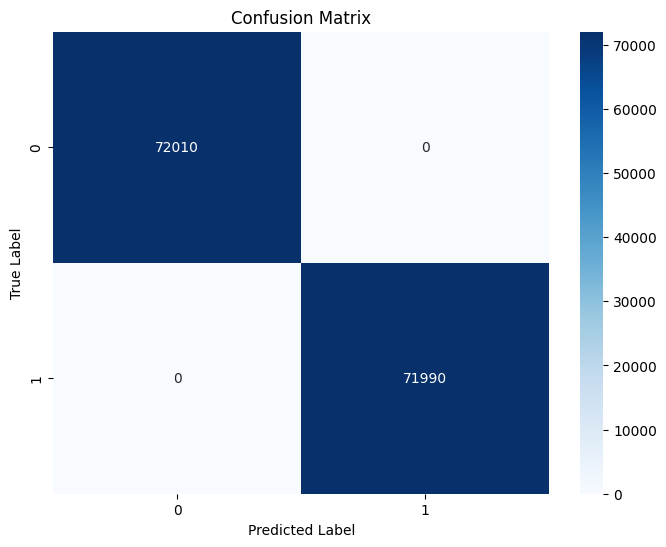

In [81]:
print(f"Classifier: Random Forest")
print(f"Train")

# Calculate accuracy, precision and recall
accuracy_RF = accuracy_score(y_train, x_pred_RF)
precision_RF = precision_score(y_train, x_pred_RF)
recall_RF = recall_score(y_train, x_pred_RF)

# Print the results
print("accuracy_RF:", accuracy_RF)
print("precision_RF:", precision_RF)
print("recall_RF:", recall_RF)
# Calculate F1-score
f1_score_RF = f1_score(y_train, x_pred_RF)
# Print the F1-score
print(f"F1-score with Random Forest: {f1_score_RF:.4f}")
# Create the confusion matrix
cm = confusion_matrix(y_train, x_pred_RF)
print("Confusion Matrix:\n", cm)
# Tracer la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [82]:
# ROC Curve and AUC
# Binarize the output

y_train_binarized = label_binarize(y_train, classes=[0, 1, 2])
x_pred_binarized = label_binarize(x_pred_RF, classes=[0, 1, 2])
n_classes = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_train_binarized[:, i], x_pred_binarized[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(12, 6), dpi=80)
lw = 2
colors = ["aqua", "darkorange"]
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (AUC = {1:0.2f})".format(i, roc_auc[i])
    )

plt.plot([0, 1], [0, 1], color="black", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) for train")
plt.legend(loc="lower right")
plt.show()

#### Test

In [83]:
print(f"Test:")

# Calculate accuracy, precision and recall
accuracy_RF = accuracy_score(y_test, y_pred_RF)
precision_RF = precision_score(y_test, y_pred_RF)
recall_RF = recall_score(y_test, y_pred_RF)

# Print the results
print("accuracy_RF:", accuracy_RF)
print("precision_RF:", precision_RF)
print("recall_RF:", recall_RF)
# Calculate F1-score
f1_score_RF = f1_score(y_test, y_pred_RF)
# Print the F1-score
print(f"F1-score with Random Forest: {f1_score_RF:.4f}")
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_RF)
print("Confusion Matrix:\n", cm)
# Tracer la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Test:
accuracy_RF: 0.9999722222222223
precision_RF: 1.0
recall_RF: 0.9999444752915048
F1-score with Random Forest: 1.0000
Confusion Matrix:
 [[17990     0]
 [    1 18009]]


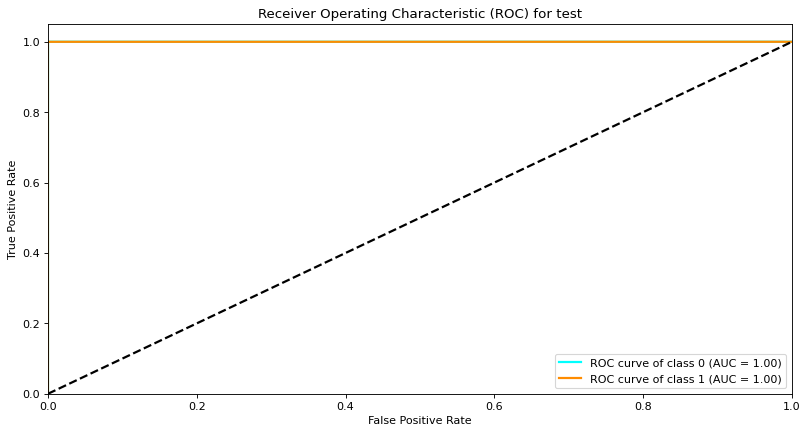

In [84]:
# ROC Curve and AUC
# Binarize the output

y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
y_pred_binarized = label_binarize(y_pred_RF, classes=[0, 1, 2])
n_classes = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_binarized[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(12, 6), dpi=80)
lw = 2
colors = ["aqua", "darkorange"]
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (AUC = {1:0.2f})".format(i, roc_auc[i])
    )

plt.plot([0, 1], [0, 1], color="black", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) for test")
plt.legend(loc="lower right")
plt.show()

#### Feature importances

In [85]:
# Get feature importances from the Random Forest model
feature_importances = rf_model.feature_importances_
# Get the corresponding feature names
feature_names = df.drop('Label', axis=1).columns

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the top N most important features (e.g., top 10)
top_n = 10
plt.figure(figsize=(10, 6))
plt.barh(range(top_n), feature_importance_df['Importance'][:top_n], align='center')
plt.yticks(range(top_n), feature_importance_df['Feature'][:top_n])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top {} Most Important Features'.format(top_n))
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important feature at the top
plt.show()

### PCA-transformed Data

In [86]:
rf_model_pca = RandomForestClassifier()
rf_model_pca.fit(X_train_pca, y_train_pca)
y_pred_RF_pca = rf_model_pca.predict(X_test_pca)
x_pred_RF_pca = rf_model_pca.predict(X_train_pca)

models['Random Forest PCA'] = rf_model_pca

#### Train

accuracy_RF_pca: 1.0
precision_RF_pca: 1.0
recall_RF_pca: 1.0
F1-score with Random Forest: 1.0000
Confusion Matrix:
 [[72010     0]
 [    0 71990]]


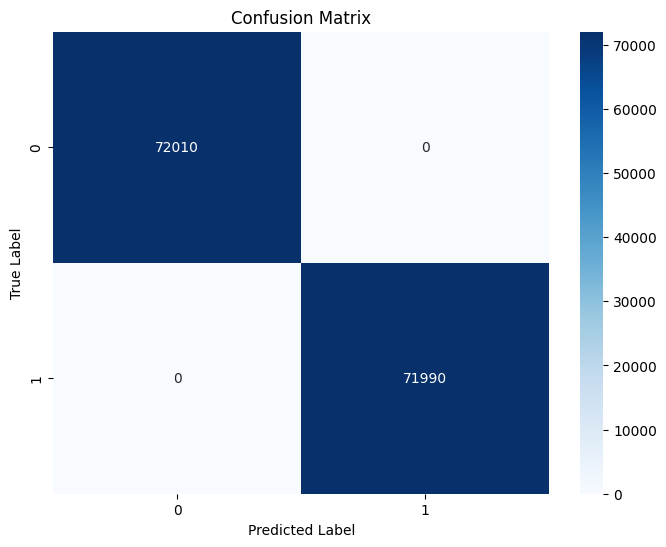

In [87]:
# Calculate accuracy, precision and recall
accuracy_RF_pca = accuracy_score(y_train_pca, x_pred_RF_pca)
precision_RF_pca = precision_score(y_train_pca, x_pred_RF_pca)
recall_RF_pca = recall_score(y_train_pca, x_pred_RF_pca)

# Print the results
print("accuracy_RF_pca:", accuracy_RF_pca)
print("precision_RF_pca:", precision_RF_pca)
print("recall_RF_pca:", recall_RF_pca)
# Calculate F1-score
f1_score_RF_pca = f1_score(y_train_pca, x_pred_RF_pca)
# Print the F1-score
print(f"F1-score with Random Forest: {f1_score_RF_pca:.4f}")
# Create the confusion matrix
cm_pca = confusion_matrix(y_train_pca, x_pred_RF_pca)
print("Confusion Matrix:\n", cm_pca)
# Tracer la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm_pca, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [88]:
# ROC Curve and AUC
# Binarize the output

y_train_binarized = label_binarize(y_train_pca, classes=[0, 1, 2])
x_pred_binarized = label_binarize(x_pred_RF_pca, classes=[0, 1, 2])
n_classes = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_train_binarized[:, i], x_pred_binarized[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(12, 6), dpi=80)
lw = 2
colors = ["aqua", "darkorange"]
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (AUC = {1:0.2f})".format(i, roc_auc[i])
    )

plt.plot([0, 1], [0, 1], color="black", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) for train")
plt.legend(loc="lower right")
plt.show()

#### Test

In [89]:
# Calculate accuracy, precision and recall
accuracy_RF_pca = accuracy_score(y_test_pca, y_pred_RF_pca)
precision_RF_pca = precision_score(y_test_pca, y_pred_RF_pca)
recall_RF_pca = recall_score(y_test_pca, y_pred_RF_pca)

# Print the results
print("accuracy_RF_pca:", accuracy_RF_pca)
print("precision_RF_pca:", precision_RF_pca)
print("recall_RF_pca:", recall_RF_pca)
# Calculate F1-score
f1_score_RF_pca = f1_score(y_test_pca, y_pred_RF_pca)
# Print the F1-score
print(f"F1-score with Random Forest: {f1_score_RF_pca:.4f}")
# Create the confusion matrix
cm_pca = confusion_matrix(y_test_pca, y_pred_RF_pca)
print("Confusion Matrix:\n", cm_pca)
# Tracer la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm_pca, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

accuracy_RF_pca: 0.9999166666666667
precision_RF_pca: 1.0
recall_RF_pca: 0.9998334258745142
F1-score with Random Forest: 0.9999
Confusion Matrix:
 [[17990     0]
 [    3 18007]]


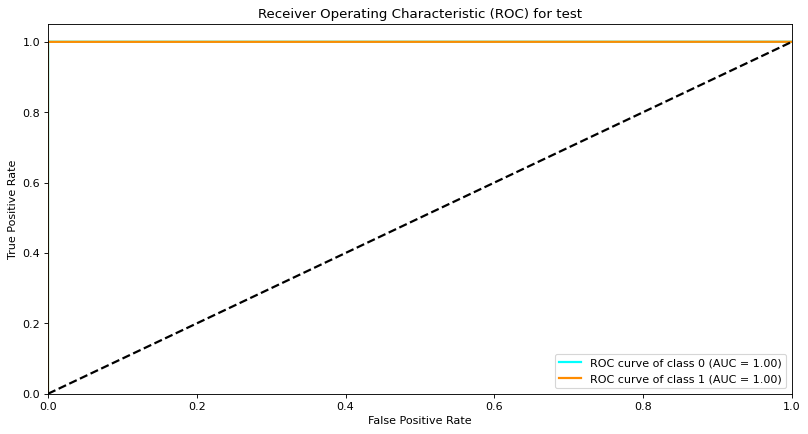

In [90]:
# ROC Curve and AUC
# Binarize the output

y_test_binarized = label_binarize(y_test_pca, classes=[0, 1, 2])
y_pred_binarized = label_binarize(y_pred_RF_pca, classes=[0, 1, 2])
n_classes = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_binarized[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(12, 6), dpi=80)
lw = 2
colors = ["aqua", "darkorange"]
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (AUC = {1:0.2f})".format(i, roc_auc[i])
    )

plt.plot([0, 1], [0, 1], color="black", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) for test")
plt.legend(loc="lower right")
plt.show()

#### Feature Importance

In [91]:
# Get feature importances from the Random Forest model
feature_importances = rf_model_pca.feature_importances_
# Get the corresponding feature names
feature_names = df_pca.drop('Label', axis=1).columns

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the top N most important features (e.g., top 10)
top_n = 10
plt.figure(figsize=(10, 6))
plt.barh(range(top_n), feature_importance_df['Importance'][:top_n], align='center')
plt.yticks(range(top_n), feature_importance_df['Feature'][:top_n])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top {} Most Important Features'.format(top_n))
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important feature at the top
plt.show()

## Logistic Regression

### Normal data

In [92]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_LR = lr_model.predict(X_test)
x_pred_LR = lr_model.predict(X_train)

models['Logistic Regression'] = lr_model

C:\Users\burak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Train

In [93]:
print(f"Classifier: Logistic Regression")

accuracy_LR = accuracy_score(y_train, x_pred_LR)
precision_LR = precision_score(y_train, x_pred_LR)
recall_LR = recall_score(y_train, x_pred_LR)
# Print the results
print("accuracy_LR:", accuracy_LR)
print("precision_LR:", precision_LR)
print("recall_LR:", recall_LR)
# Calculate F1-score
f1_score_LR = f1_score(y_train, x_pred_LR)
# Print the F1-score
print(f"F1-score with logistic Regression: {f1_score_LR:.4f}")
# Create the confusion matrix
cm = confusion_matrix(y_train, x_pred_LR)
print("Confusion Matrix:\n", cm)
# Tracer la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Classifier: Logistic Regression
accuracy_LR: 0.9824513888888889
precision_LR: 0.9822680755932627
recall_LR: 0.9826364772885123
F1-score with logistic Regression: 0.9825
Confusion Matrix:
 [[70733  1277]
 [ 1250 70740]]


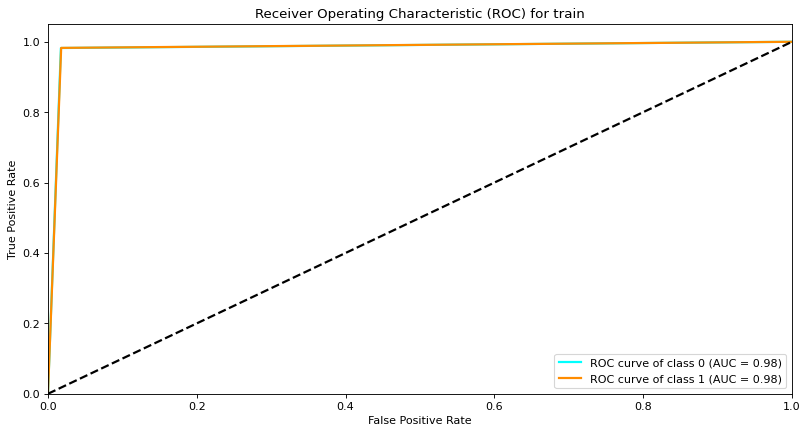

In [94]:
# ROC Curve and AUC
# Binarize the output

y_train_binarized = label_binarize(y_train, classes=[0, 1, 2])
x_pred_binarized = label_binarize(x_pred_LR, classes=[0, 1, 2])
n_classes = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_train_binarized[:, i], x_pred_binarized[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(12, 6), dpi=80)
lw = 2
colors = ["aqua", "darkorange"]
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (AUC = {1:0.2f})".format(i, roc_auc[i])
    )

plt.plot([0, 1], [0, 1], color="black", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) for train")
plt.legend(loc="lower right")
plt.show()

#### Test

accuracy_LR: 0.9824722222222222
precision_LR: 0.9825087456271864
recall_LR: 0.9824541921154913
F1-score with logistic Regression: 0.9825
Confusion Matrix:
 [[17675   315]
 [  316 17694]]


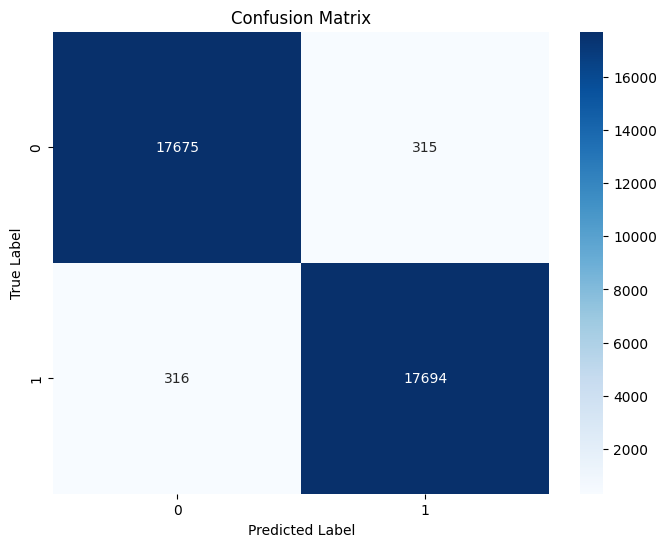

In [95]:
accuracy_LR = accuracy_score(y_test, y_pred_LR)
precision_LR = precision_score(y_test, y_pred_LR)
recall_LR = recall_score(y_test, y_pred_LR)
# Print the results
print("accuracy_LR:", accuracy_LR)
print("precision_LR:", precision_LR)
print("recall_LR:", recall_LR)
# Calculate F1-score
f1_score_LR = f1_score(y_test, y_pred_LR)
# Print the F1-score
print(f"F1-score with logistic Regression: {f1_score_LR:.4f}")
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_LR)
print("Confusion Matrix:\n", cm)
# Tracer la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

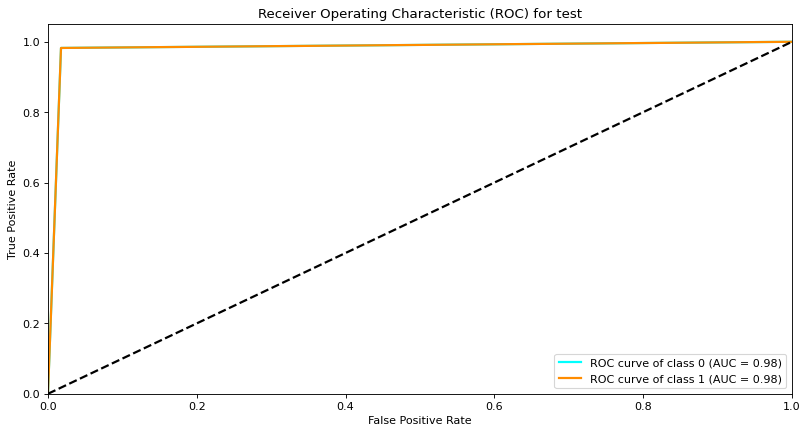

In [96]:
# ROC Curve and AUC
# Binarize the output

y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
y_pred_binarized = label_binarize(y_pred_LR, classes=[0, 1, 2])
n_classes = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_binarized[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(12, 6), dpi=80)
lw = 2
colors = ["aqua", "darkorange"]
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (AUC = {1:0.2f})".format(i, roc_auc[i])
    )

plt.plot([0, 1], [0, 1], color="black", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) for test")
plt.legend(loc="lower right")
plt.show()

#### Feature Importance

In [97]:
# Get the corresponding feature names
importance = lr_model.coef_[0]
#importance is a list so you can plot it. 
feat_importances = pd.Series(importance)
feat_importances.nlargest(20).plot(kind='barh',title = 'Feature Importance')

<Axes: title={'center': 'Feature Importance'}>

### PCA-transformed Data

In [98]:
lr_model_pca = LogisticRegression()
lr_model_pca.fit(X_train_pca, y_train_pca)
y_pred_LR_pca = lr_model_pca.predict(X_test_pca)
x_pred_LR_pca = lr_model_pca.predict(X_train_pca)

models['Logistic Regression PCA'] = lr_model_pca

#### Train

Classifier: Logistic Regression
accuracy_LR_pca: 0.9990208333333334
precision_LR_pca: 0.998307741389594
recall_LR_pca: 0.9997360744547854
F1-score with logistic Regression: 0.9990
Confusion Matrix:
 [[71888   122]
 [   19 71971]]


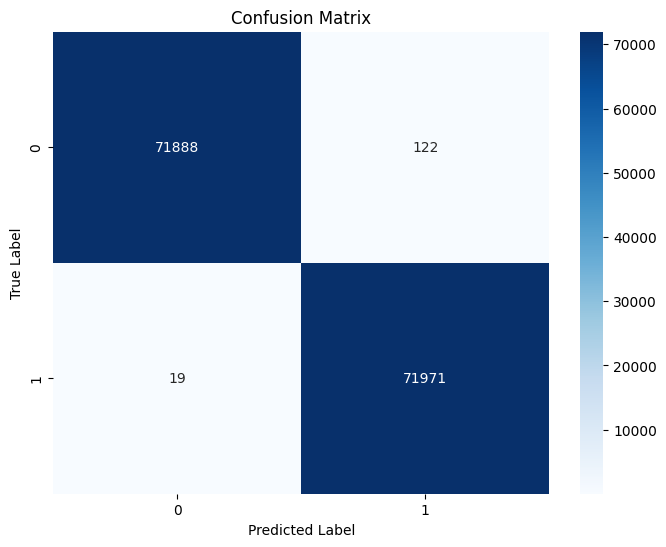

In [99]:
print(f"Classifier: Logistic Regression")

accuracy_LR_pca = accuracy_score(y_train_pca, x_pred_LR_pca)
precision_LR_pca = precision_score(y_train_pca, x_pred_LR_pca)
recall_LR_pca = recall_score(y_train_pca, x_pred_LR_pca)
# Print the results
print("accuracy_LR_pca:", accuracy_LR_pca)
print("precision_LR_pca:", precision_LR_pca)
print("recall_LR_pca:", recall_LR_pca)
# Calculate F1-score
f1_score_LR_pca = f1_score(y_train_pca, x_pred_LR_pca)
# Print the F1-score
print(f"F1-score with logistic Regression: {f1_score_LR_pca:.4f}")
# Create the confusion matrix
cm_pca = confusion_matrix(y_train_pca, x_pred_LR_pca)
print("Confusion Matrix:\n", cm_pca)
# Tracer la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm_pca, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [100]:
# ROC Curve and AUC
# Binarize the output

y_train_binarized = label_binarize(y_train_pca, classes=[0, 1, 2])
x_pred_binarized = label_binarize(x_pred_LR_pca, classes=[0, 1, 2])
n_classes = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_train_binarized[:, i], x_pred_binarized[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(12, 6), dpi=80)
lw = 2
colors = ["aqua", "darkorange"]
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (AUC = {1:0.2f})".format(i, roc_auc[i])
    )

plt.plot([0, 1], [0, 1], color="black", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) for train")
plt.legend(loc="lower right")
plt.show()

#### Test

Classifier: Logistic Regression
accuracy_LR_pca: 0.9988611111111111
precision_LR_pca: 0.9980045452025941
recall_LR_pca: 0.9997223764575236
F1-score with logistic Regression: 0.9989
Confusion Matrix:
 [[17954    36]
 [    5 18005]]


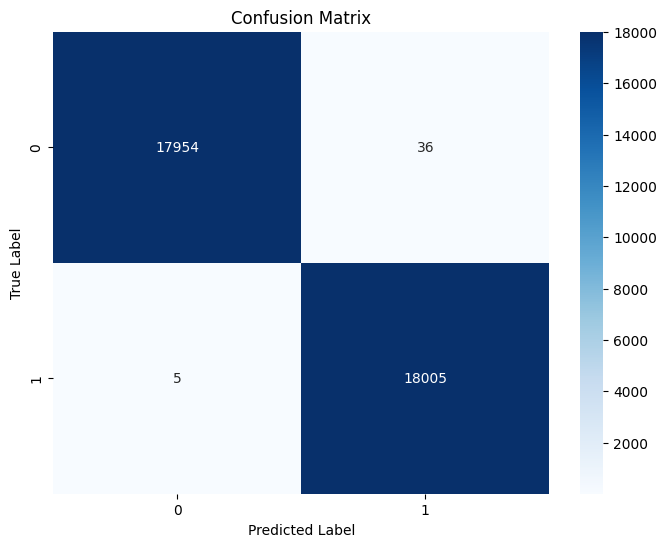

In [101]:
print(f"Classifier: Logistic Regression")

accuracy_LR_pca = accuracy_score(y_test_pca, y_pred_LR_pca)
precision_LR_pca = precision_score(y_test_pca, y_pred_LR_pca)
recall_LR_pca = recall_score(y_test_pca, y_pred_LR_pca)
# Print the results
print("accuracy_LR_pca:", accuracy_LR_pca)
print("precision_LR_pca:", precision_LR_pca)
print("recall_LR_pca:", recall_LR_pca)
# Calculate F1-score
f1_score_LR_pca = f1_score(y_test_pca, y_pred_LR_pca)
# Print the F1-score
print(f"F1-score with logistic Regression: {f1_score_LR_pca:.4f}")
# Create the confusion matrix
cm_pca = confusion_matrix(y_test_pca, y_pred_LR_pca)
print("Confusion Matrix:\n", cm_pca)
# Tracer la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm_pca, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [102]:
# ROC Curve and AUC
# Binarize the output

y_test_binarized = label_binarize(y_test_pca, classes=[0, 1, 2])
y_pred_binarized = label_binarize(y_pred_LR_pca, classes=[0, 1, 2])
n_classes = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_binarized[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(12, 6), dpi=80)
lw = 2
colors = ["aqua", "darkorange"]
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (AUC = {1:0.2f})".format(i, roc_auc[i])
    )

plt.plot([0, 1], [0, 1], color="black", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) for test")
plt.legend(loc="lower right")
plt.show()

#### Feature Importance

<Axes: title={'center': 'Feature Importance'}>

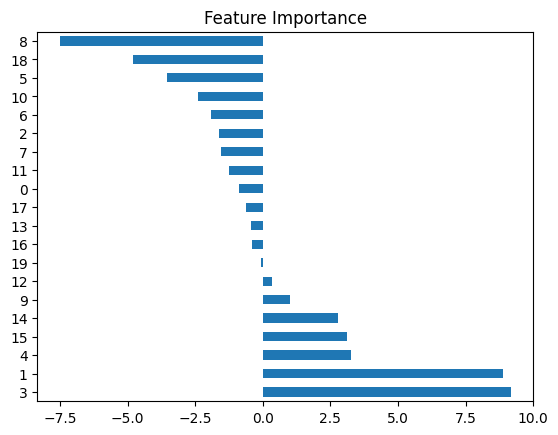

In [103]:
# Get the corresponding feature names
importance = lr_model_pca.coef_[0]
#importance is a list so you can plot it. 
feat_importances = pd.Series(importance)
feat_importances.nlargest(20).plot(kind='barh',title = 'Feature Importance')

## SVM

### Normal Data

In [104]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
x_pred_svm = svm_model.predict(X_train)

models['SVM'] = svm_model

#### Train

Classifier: SVM
accuracy_svm: 0.9860902777777778
precision_svm: 0.9852323307957902
recall_svm: 0.9869704125572997
F1-score with knn: 0.9861
Confusion Matrix:
 [[70945  1065]
 [  938 71052]]


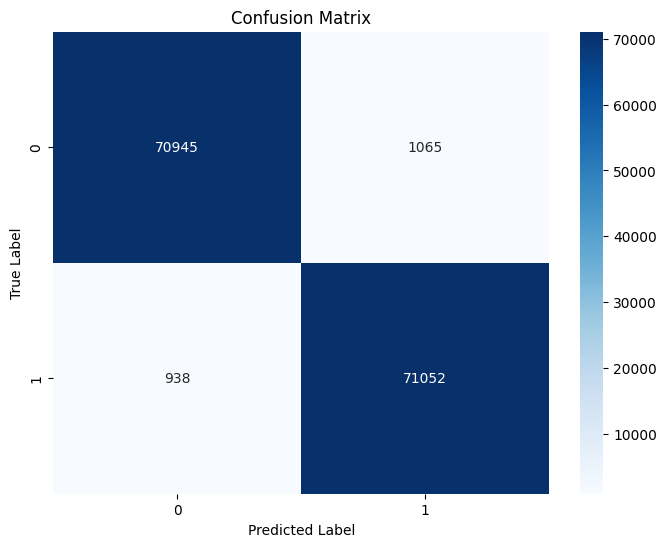

In [105]:
print(f"Classifier: SVM")

# Calculate accuracy, precision and recall
accuracy_svm = accuracy_score(y_train, x_pred_svm)
precision_svm = precision_score(y_train, x_pred_svm)
recall_svm = recall_score(y_train, x_pred_svm)

# Print the results
print("accuracy_svm:", accuracy_svm)
print("precision_svm:", precision_svm)
print("recall_svm:", recall_svm)
# Calculate F1-score
f1_score_svm = f1_score(y_train, x_pred_svm)
# Print the F1-score
print(f"F1-score with knn: {f1_score_svm:.4f}")
# Create the confusion matrix
cm = confusion_matrix(y_train, x_pred_svm)
print("Confusion Matrix:\n", cm)
# Tracer la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

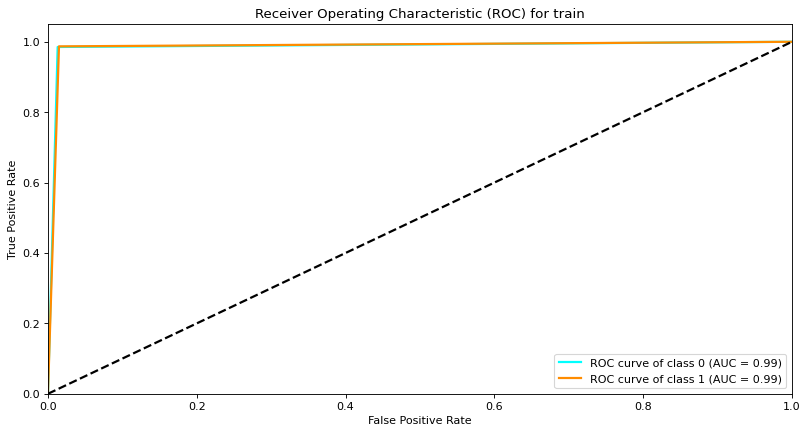

In [106]:
# ROC Curve and AUC
# Binarize the output

y_train_binarized = label_binarize(y_train, classes=[0, 1, 2])
x_pred_binarized = label_binarize(x_pred_svm, classes=[0, 1, 2])
n_classes = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_train_binarized[:, i], x_pred_binarized[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(12, 6), dpi=80)
lw = 2
colors = ["aqua", "darkorange"]
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (AUC = {1:0.2f})".format(i, roc_auc[i])
    )

plt.plot([0, 1], [0, 1], color="black", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) for train")
plt.legend(loc="lower right")
plt.show()

#### Test

Classifier: SVM
accuracy_svm: 0.9860833333333333
precision_svm: 0.9854172442472969
recall_svm: 0.9867851193781233
F1-score with knn: 0.9861
Confusion Matrix:
 [[17727   263]
 [  238 17772]]


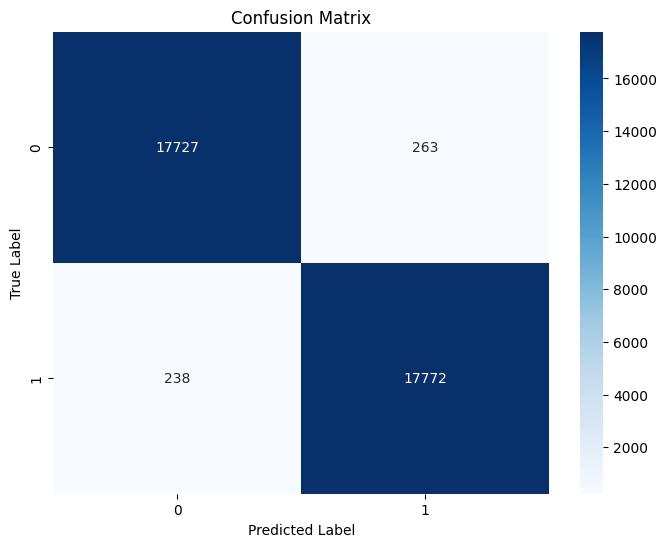

In [107]:
print(f"Classifier: SVM")

# Calculate accuracy, precision and recall
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)

# Print the results
print("accuracy_svm:", accuracy_svm)
print("precision_svm:", precision_svm)
print("recall_svm:", recall_svm)
# Calculate F1-score
f1_score_svm = f1_score(y_test, y_pred_svm)
# Print the F1-score
print(f"F1-score with knn: {f1_score_svm:.4f}")
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix:\n", cm)
# Tracer la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

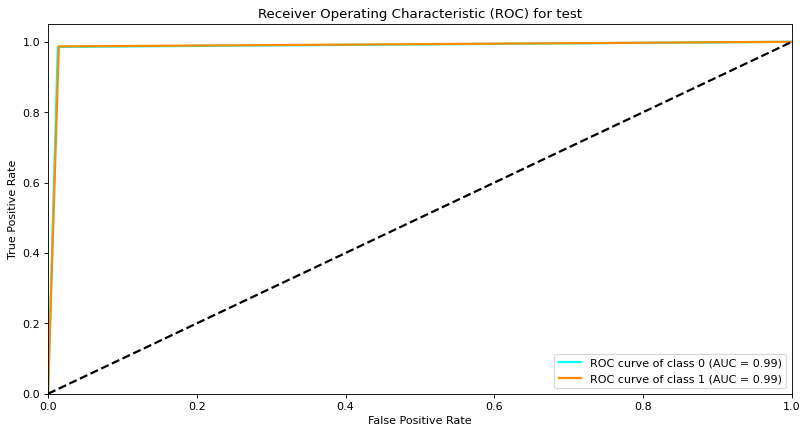

In [108]:
# ROC Curve and AUC
# Binarize the output

y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
y_pred_binarized = label_binarize(y_pred_svm, classes=[0, 1, 2])
n_classes = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_binarized[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(12, 6), dpi=80)
lw = 2
colors = ["aqua", "darkorange"]
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (AUC = {1:0.2f})".format(i, roc_auc[i])
    )

plt.plot([0, 1], [0, 1], color="black", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) for test")
plt.legend(loc="lower right")
plt.show()

### PCA-transformed Data

In [109]:
svm_model_pca = SVC()
svm_model_pca.fit(X_train_pca, y_train_pca)
y_pred_svm_pca = svm_model_pca.predict(X_test_pca)
x_pred_svm_pca = svm_model_pca.predict(X_train_pca)

models['SVM PCA'] = svm_model_pca

#### Train

Classifier: SVM
accuracy_svm: 0.9993263888888889
precision_svm: 0.999014368015548
recall_svm: 0.9996388387276011
F1-score with knn: 0.9993
Confusion Matrix:
 [[71939    71]
 [   26 71964]]


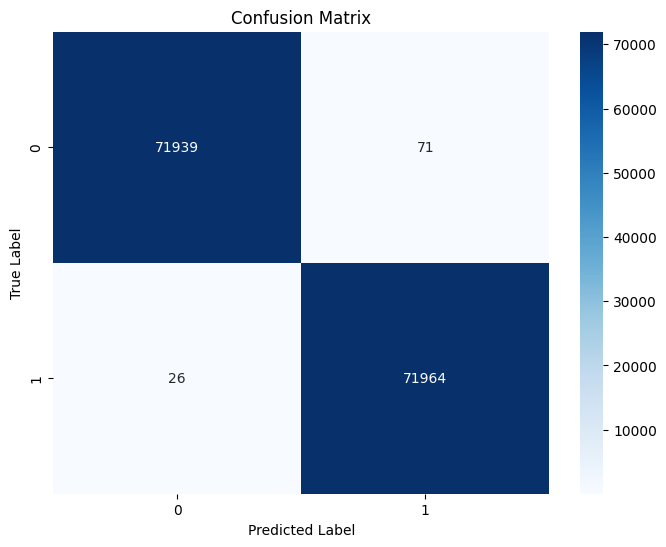

In [110]:
print(f"Classifier: SVM")

# Calculate accuracy, precision and recall
accuracy_svm = accuracy_score(y_train_pca, x_pred_svm_pca)
precision_svm = precision_score(y_train_pca, x_pred_svm_pca)
recall_svm = recall_score(y_train_pca, x_pred_svm_pca)

# Print the results
print("accuracy_svm:", accuracy_svm)
print("precision_svm:", precision_svm)
print("recall_svm:", recall_svm)
# Calculate F1-score
f1_score_svm = f1_score(y_train_pca, x_pred_svm_pca)
# Print the F1-score
print(f"F1-score with knn: {f1_score_svm:.4f}")
# Create the confusion matrix
cm = confusion_matrix(y_train_pca, x_pred_svm_pca)
print("Confusion Matrix:\n", cm)
# Tracer la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

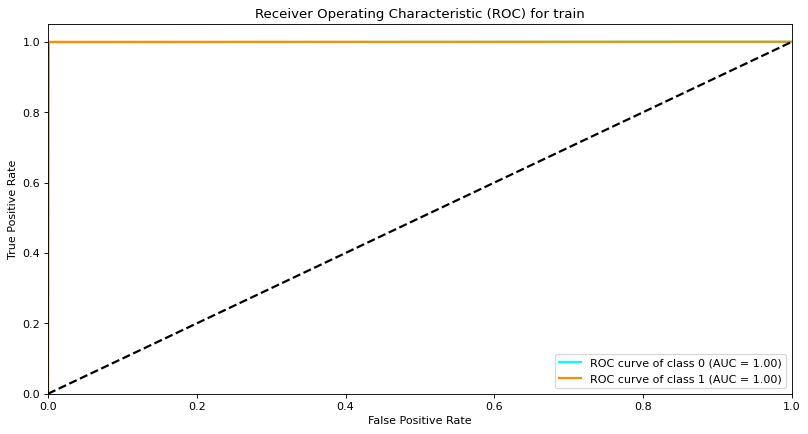

In [111]:
# ROC Curve and AUC
# Binarize the output

y_train_binarized = label_binarize(y_train_pca, classes=[0, 1, 2])
x_pred_binarized = label_binarize(x_pred_svm_pca, classes=[0, 1, 2])
n_classes = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_train_binarized[:, i], x_pred_binarized[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(12, 6), dpi=80)
lw = 2
colors = ["aqua", "darkorange"]
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (AUC = {1:0.2f})".format(i, roc_auc[i])
    )

plt.plot([0, 1], [0, 1], color="black", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) for train")
plt.legend(loc="lower right")
plt.show()

#### Test

Classifier: SVM
accuracy_svm: 0.9991944444444445
precision_svm: 0.9987794729542302
recall_svm: 0.999611327040533
F1-score with knn: 0.9992
Confusion Matrix:
 [[17968    22]
 [    7 18003]]


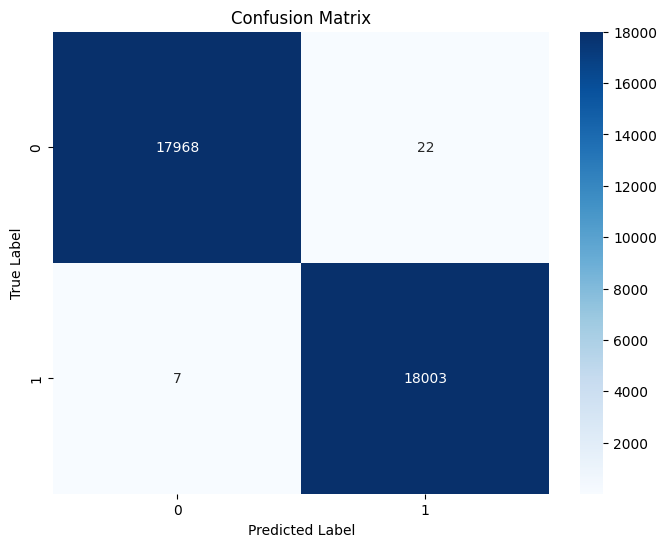

In [112]:
print(f"Classifier: SVM")

# Calculate accuracy, precision and recall
accuracy_svm = accuracy_score(y_test_pca, y_pred_svm_pca)
precision_svm = precision_score(y_test_pca, y_pred_svm_pca)
recall_svm = recall_score(y_test_pca, y_pred_svm_pca)

# Print the results
print("accuracy_svm:", accuracy_svm)
print("precision_svm:", precision_svm)
print("recall_svm:", recall_svm)
# Calculate F1-score
f1_score_svm = f1_score(y_test_pca, y_pred_svm_pca)
# Print the F1-score
print(f"F1-score with knn: {f1_score_svm:.4f}")
# Create the confusion matrix
cm = confusion_matrix(y_test_pca, y_pred_svm_pca)
print("Confusion Matrix:\n", cm)
# Tracer la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

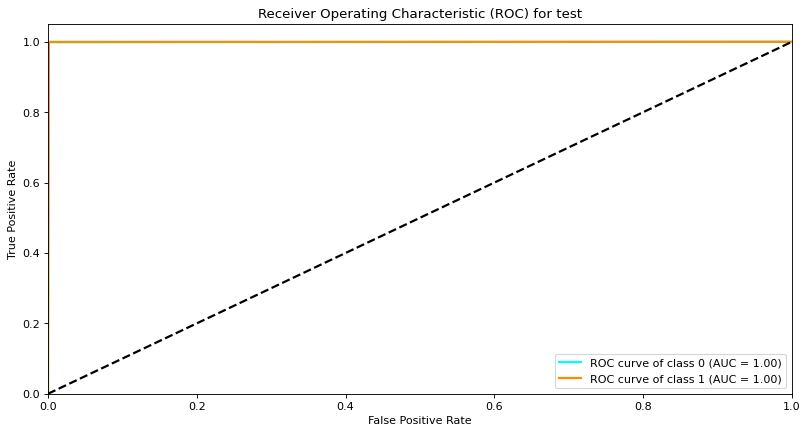

In [113]:
# ROC Curve and AUC
# Binarize the output

y_test_binarized = label_binarize(y_test_pca, classes=[0, 1, 2])
y_pred_binarized = label_binarize(y_pred_svm_pca, classes=[0, 1, 2])
n_classes = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_binarized[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(12, 6), dpi=80)
lw = 2
colors = ["aqua", "darkorange"]
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (AUC = {1:0.2f})".format(i, roc_auc[i])
    )

plt.plot([0, 1], [0, 1], color="black", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) for test")
plt.legend(loc="lower right")
plt.show()

## K-Nearest Neighbors

### Normal Data

In [114]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
x_pred_knn = knn_model.predict(X_train)

models['K-Nearest Neighbors'] = knn_model

#### Train

Classifier: K Neighbors
accuracy_knn: 0.9988125
precision_knn: 0.9983070368982696
recall_knn: 0.9993193499097097
F1-score with knn: 0.9988
Confusion Matrix:
 [[71888   122]
 [   49 71941]]


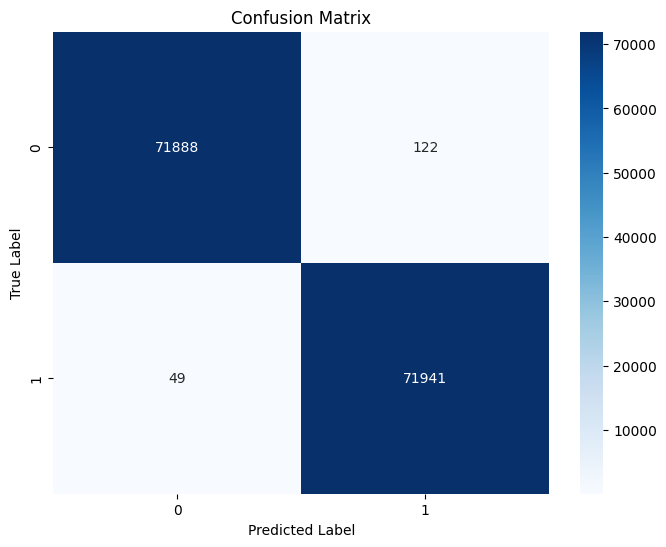

In [115]:
print(f"Classifier: K Neighbors")

# Calculate accuracy, precision and recall
accuracy_knn = accuracy_score(y_train, x_pred_knn)
precision_knn = precision_score(y_train, x_pred_knn)
recall_knn = recall_score(y_train, x_pred_knn)

# Print the results
print("accuracy_knn:", accuracy_knn)
print("precision_knn:", precision_knn)
print("recall_knn:", recall_knn)
# Calculate F1-score
f1_score_knn = f1_score(y_train, x_pred_knn)
# Print the F1-score
print(f"F1-score with knn: {f1_score_knn:.4f}")
# Create the confusion matrix
cm = confusion_matrix(y_train, x_pred_knn)
print("Confusion Matrix:\n", cm)
# Tracer la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

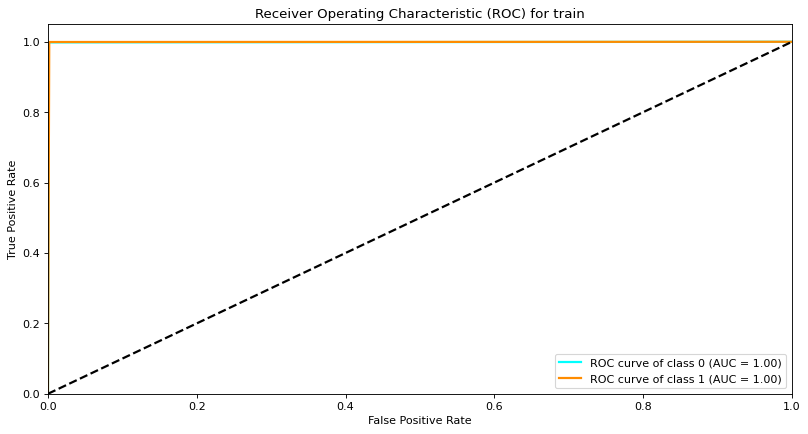

In [116]:
# ROC Curve and AUC
# Binarize the output

y_train_binarized = label_binarize(y_train, classes=[0, 1, 2])
x_pred_binarized = label_binarize(x_pred_knn, classes=[0, 1, 2])
n_classes = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_train_binarized[:, i], x_pred_binarized[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(12, 6), dpi=80)
lw = 2
colors = ["aqua", "darkorange"]
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (AUC = {1:0.2f})".format(i, roc_auc[i])
    )

plt.plot([0, 1], [0, 1], color="black", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) for train")
plt.legend(loc="lower right")
plt.show()

#### Test

Classifier: K Neighbors
accuracy_knn: 0.9983611111111111
precision_knn: 0.9975608404013526
recall_knn: 0.9991671293725708
F1-score with knn: 0.9984
Confusion Matrix:
 [[17946    44]
 [   15 17995]]


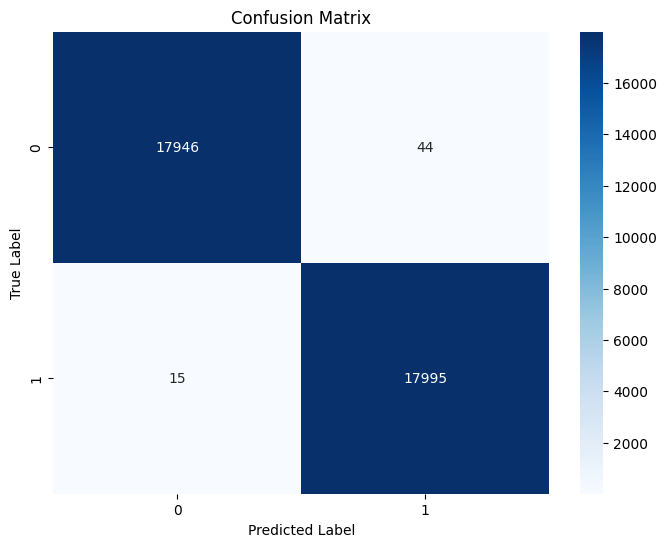

In [117]:
print(f"Classifier: K Neighbors")

# Calculate accuracy, precision and recall
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)

# Print the results
print("accuracy_knn:", accuracy_knn)
print("precision_knn:", precision_knn)
print("recall_knn:", recall_knn)
# Calculate F1-score
f1_score_knn = f1_score(y_test, y_pred_knn)
# Print the F1-score
print(f"F1-score with knn: {f1_score_knn:.4f}")
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix:\n", cm)
# Tracer la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

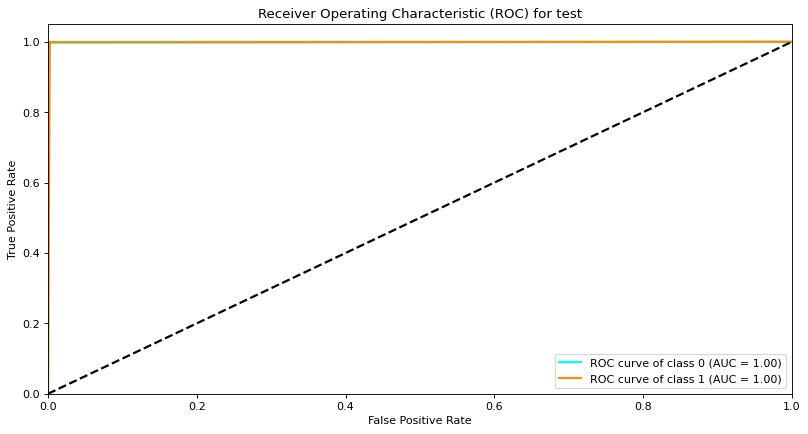

In [118]:
# ROC Curve and AUC
# Binarize the output

y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
y_pred_binarized = label_binarize(y_pred_knn, classes=[0, 1, 2])
n_classes = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_binarized[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(12, 6), dpi=80)
lw = 2
colors = ["aqua", "darkorange"]
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (AUC = {1:0.2f})".format(i, roc_auc[i])
    )

plt.plot([0, 1], [0, 1], color="black", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) for test")
plt.legend(loc="lower right")
plt.show()

### PCA-transformed Data

In [119]:
knn_model_pca = KNeighborsClassifier()
knn_model_pca.fit(X_train_pca, y_train_pca)
y_pred_knn_pca = knn_model_pca.predict(X_test_pca)
x_pred_knn_pca = knn_model_pca.predict(X_train_pca)

models['K-Nearest Neighbors PCA'] = knn_model_pca

#### Train

Classifier: K Neighbors
accuracy_knn: 0.9998958333333333
precision_knn: 0.9999027629221131
recall_knn: 0.9998888734546465
F1-score with knn: 0.9999
Confusion Matrix:
 [[72003     7]
 [    8 71982]]


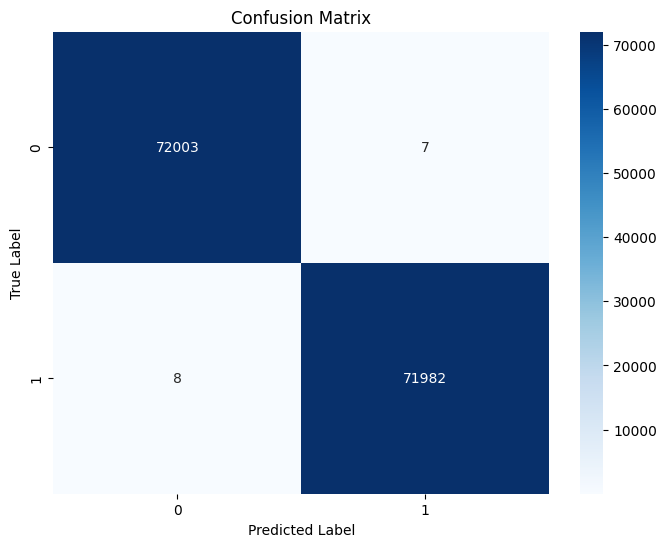

In [120]:
print(f"Classifier: K Neighbors")

# Calculate accuracy, precision and recall
accuracy_knn = accuracy_score(y_train_pca, x_pred_knn_pca)
precision_knn = precision_score(y_train_pca, x_pred_knn_pca)
recall_knn = recall_score(y_train_pca, x_pred_knn_pca)

# Print the results
print("accuracy_knn:", accuracy_knn)
print("precision_knn:", precision_knn)
print("recall_knn:", recall_knn)
# Calculate F1-score
f1_score_knn = f1_score(y_train_pca, x_pred_knn_pca)
# Print the F1-score
print(f"F1-score with knn: {f1_score_knn:.4f}")
# Create the confusion matrix
cm = confusion_matrix(y_train_pca, x_pred_knn_pca)
print("Confusion Matrix:\n", cm)
# Tracer la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

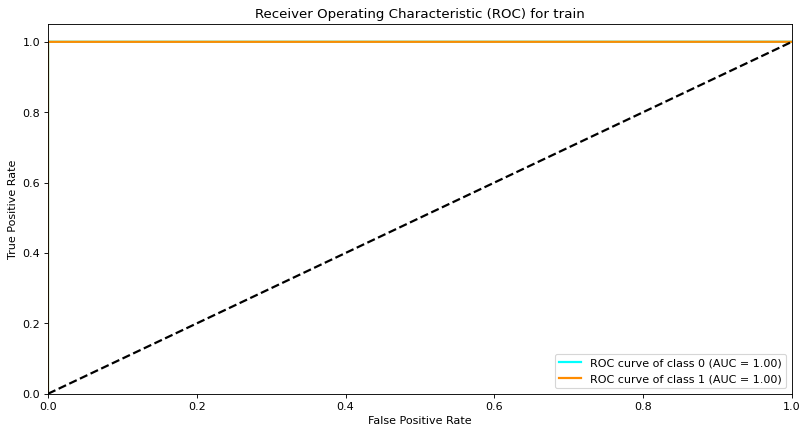

In [121]:
# ROC Curve and AUC
# Binarize the output

y_train_binarized = label_binarize(y_train_pca, classes=[0, 1, 2])
x_pred_binarized = label_binarize(x_pred_knn_pca, classes=[0, 1, 2])
n_classes = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_train_binarized[:, i], x_pred_binarized[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(12, 6), dpi=80)
lw = 2
colors = ["aqua", "darkorange"]
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (AUC = {1:0.2f})".format(i, roc_auc[i])
    )

plt.plot([0, 1], [0, 1], color="black", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) for train")
plt.legend(loc="lower right")
plt.show()

#### Test

Classifier: K Neighbors
accuracy_knn_pca: 0.9999166666666667
precision_knn_pca: 0.9999444722083403
recall_knn_pca: 0.9998889505830094
F1-score with knn: 0.9999
Confusion Matrix:
 [[17989     1]
 [    2 18008]]


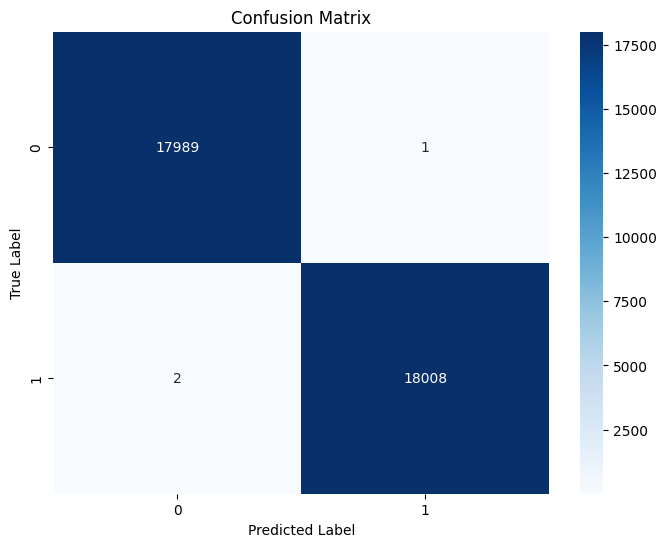

In [122]:
print(f"Classifier: K Neighbors")

# Calculate accuracy, precision and recall
accuracy_knn_pca = accuracy_score(y_test_pca, y_pred_knn_pca)
precision_knn_pca = precision_score(y_test_pca, y_pred_knn_pca)
recall_knn_pca = recall_score(y_test_pca, y_pred_knn_pca)

# Print the results
print("accuracy_knn_pca:", accuracy_knn_pca)
print("precision_knn_pca:", precision_knn_pca)
print("recall_knn_pca:", recall_knn_pca)
# Calculate F1-score
f1_score_knn_pca = f1_score(y_test_pca, y_pred_knn_pca)
# Print the F1-score
print(f"F1-score with knn: {f1_score_knn_pca:.4f}")
# Create the confusion matrix
cm_pca = confusion_matrix(y_test_pca, y_pred_knn_pca)
print("Confusion Matrix:\n", cm_pca)
# Tracer la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm_pca, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

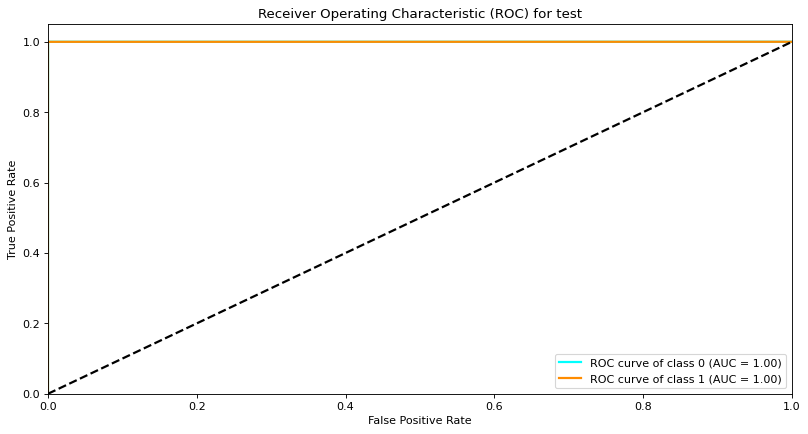

In [123]:
# ROC Curve and AUC
# Binarize the output

y_test_binarized = label_binarize(y_test_pca, classes=[0, 1, 2])
y_pred_binarized = label_binarize(y_pred_knn_pca, classes=[0, 1, 2])
n_classes = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_binarized[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(12, 6), dpi=80)
lw = 2
colors = ["aqua", "darkorange"]
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (AUC = {1:0.2f})".format(i, roc_auc[i])
    )

plt.plot([0, 1], [0, 1], color="black", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) for test")
plt.legend(loc="lower right")
plt.show()

## Decision Tree

### Normal Data

In [124]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_DT = dt_model.predict(X_test)
x_pred_DT = dt_model.predict(X_train)

models['Decision Tree'] = dt_model

#### Train

Classifier: Decision Tree
accuracy_DT: 1.0
precision_DT: 1.0
recall_DT: 1.0
F1-score with DecisionTree: 1.0000
Confusion Matrix:
 [[72010     0]
 [    0 71990]]


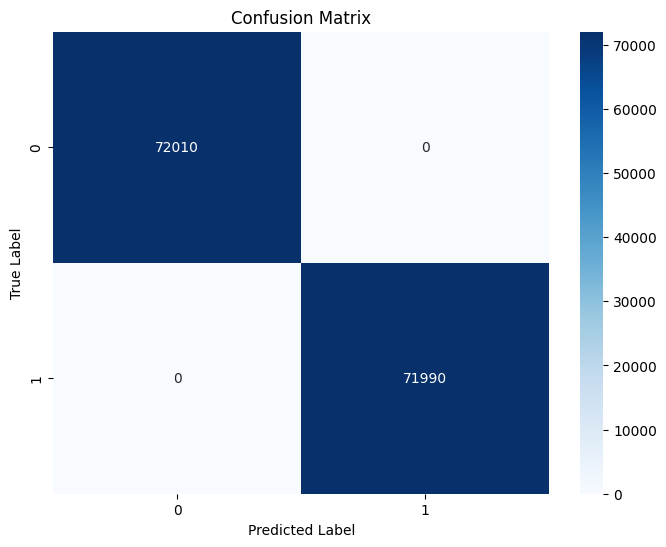

In [125]:
print(f"Classifier: Decision Tree")

# Calculate accuracy, precision and recall
accuracy_DT = accuracy_score(y_train, x_pred_DT)
precision_DT = precision_score(y_train, x_pred_DT)
recall_DT = recall_score(y_train, x_pred_DT)

# Print the results
print("accuracy_DT:", accuracy_DT)
print("precision_DT:", precision_DT)
print("recall_DT:", recall_DT)
# Calculate F1-score
f1_score_DT = f1_score(y_train, x_pred_DT)
# Print the F1-score
print(f"F1-score with DecisionTree: {f1_score_DT:.4f}")
# Create the confusion matrix
cm = confusion_matrix(y_train, x_pred_DT)
print("Confusion Matrix:\n", cm)
# Tracer la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

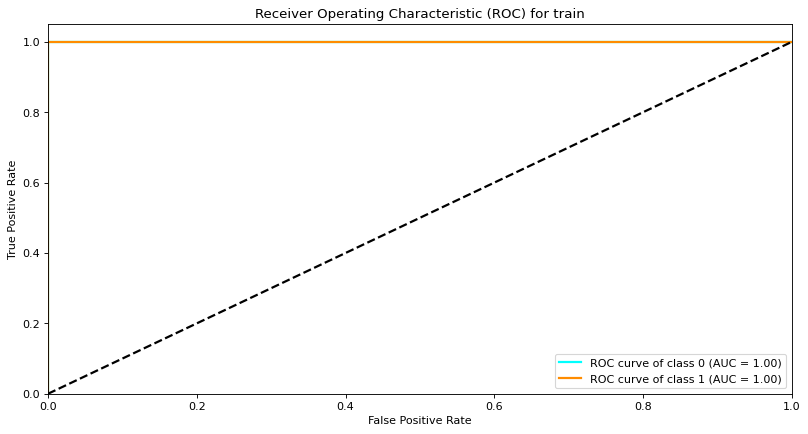

In [126]:
# ROC Curve and AUC
# Binarize the output

y_train_binarized = label_binarize(y_train, classes=[0, 1, 2])
x_pred_binarized = label_binarize(x_pred_DT, classes=[0, 1, 2])
n_classes = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_train_binarized[:, i], x_pred_binarized[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(12, 6), dpi=80)
lw = 2
colors = ["aqua", "darkorange"]
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (AUC = {1:0.2f})".format(i, roc_auc[i])
    )

plt.plot([0, 1], [0, 1], color="black", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) for train")
plt.legend(loc="lower right")
plt.show()

#### Test

Classifier: Decision Tree
accuracy_DT: 0.9999722222222223
precision_DT: 1.0
recall_DT: 0.9999444752915048
F1-score with DecisionTree: 1.0000
Confusion Matrix:
 [[17990     0]
 [    1 18009]]


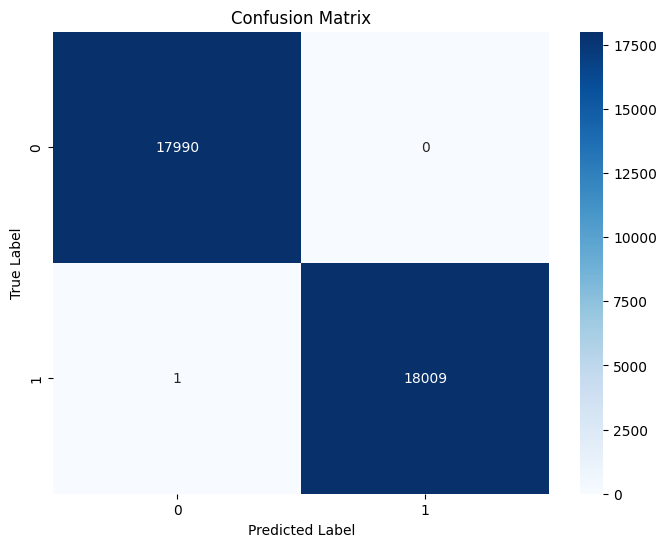

In [127]:
print(f"Classifier: Decision Tree")

# Calculate accuracy, precision and recall
accuracy_DT = accuracy_score(y_test, y_pred_DT)
precision_DT = precision_score(y_test, y_pred_DT)
recall_DT = recall_score(y_test, y_pred_DT)

# Print the results
print("accuracy_DT:", accuracy_DT)
print("precision_DT:", precision_DT)
print("recall_DT:", recall_DT)
# Calculate F1-score
f1_score_DT = f1_score(y_test, y_pred_DT)
# Print the F1-score
print(f"F1-score with DecisionTree: {f1_score_DT:.4f}")
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_DT)
print("Confusion Matrix:\n", cm)
# Tracer la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

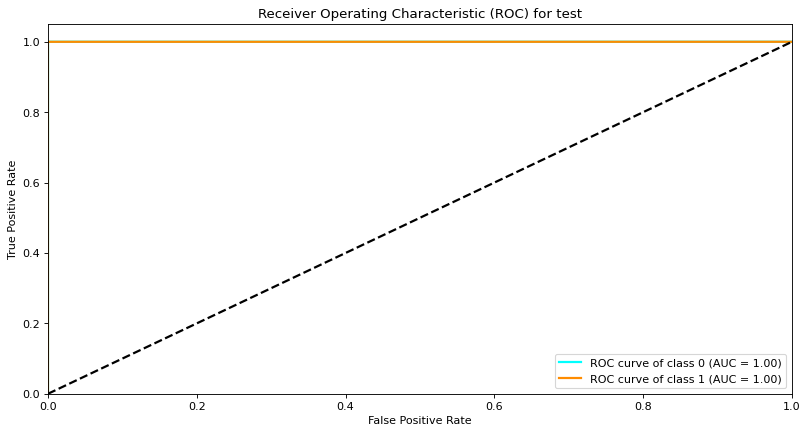

In [128]:
# ROC Curve and AUC
# Binarize the output

y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
y_pred_binarized = label_binarize(y_pred_DT, classes=[0, 1, 2])
n_classes = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_binarized[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(12, 6), dpi=80)
lw = 2
colors = ["aqua", "darkorange"]
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (AUC = {1:0.2f})".format(i, roc_auc[i])
    )

plt.plot([0, 1], [0, 1], color="black", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) for test")
plt.legend(loc="lower right")
plt.show()

#### Feature Importance

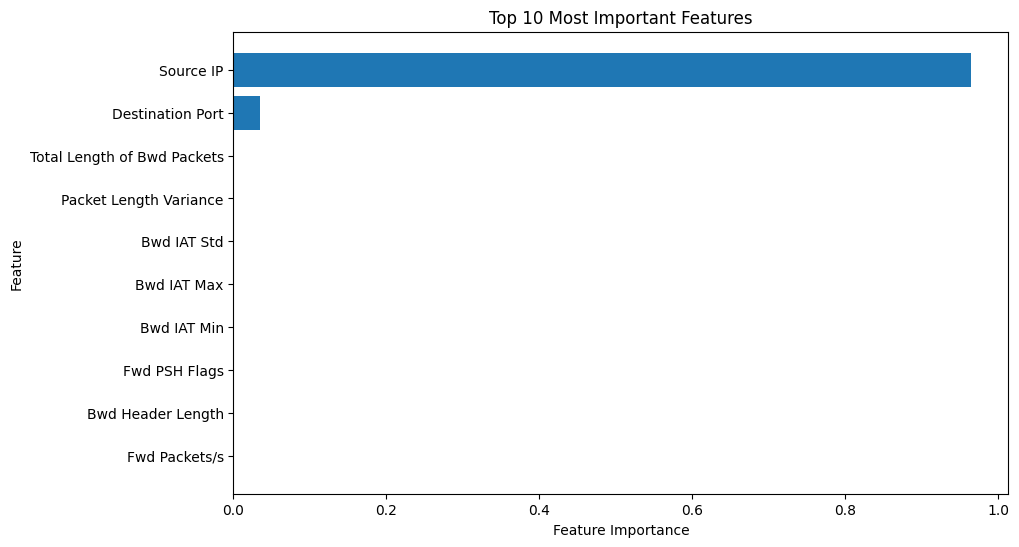

In [129]:
# Get feature importances from the Decision Tree model
feature_importances = dt_model.feature_importances_
# Get the corresponding feature names
feature_names = df.drop('Label', axis=1).columns

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the top N most important features (e.g., top 10)
top_n = 10
plt.figure(figsize=(10, 6))
plt.barh(range(top_n), feature_importance_df['Importance'][:top_n], align='center')
plt.yticks(range(top_n), feature_importance_df['Feature'][:top_n])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top {} Most Important Features'.format(top_n))
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important feature at the top
plt.show()

### PCA-transformed Data

In [130]:
dt_model_pca = DecisionTreeClassifier()
dt_model_pca.fit(X_train_pca, y_train_pca)
y_pred_DT_pca = dt_model_pca.predict(X_test_pca)
x_pred_DT_pca = dt_model_pca.predict(X_train_pca)

models['Decision Tree PCA'] = dt_model_pca

#### Train

Classifier: Decision Tree
accuracy_DT_pca: 1.0
precision_DT_pca: 1.0
recall_DT_pca: 1.0
F1-score with DecisionTree: 1.0000
Confusion Matrix:
 [[72010     0]
 [    0 71990]]


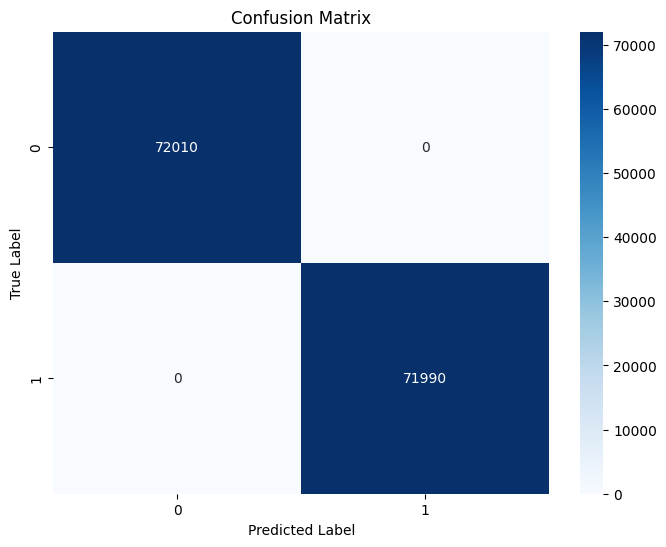

In [131]:
print(f"Classifier: Decision Tree")

# Calculate accuracy, precision and recall
accuracy_DT_pca = accuracy_score(y_train_pca, x_pred_DT_pca)
precision_DT_pca = precision_score(y_train_pca, x_pred_DT_pca)
recall_DT_pca = recall_score(y_train_pca, x_pred_DT_pca)

# Print the results
print("accuracy_DT_pca:", accuracy_DT_pca)
print("precision_DT_pca:", precision_DT_pca)
print("recall_DT_pca:", recall_DT_pca)
# Calculate F1-score
f1_score_DT_pca = f1_score(y_train_pca, x_pred_DT_pca)
# Print the F1-score
print(f"F1-score with DecisionTree: {f1_score_DT_pca:.4f}")
# Create the confusion matrix
cm_pca = confusion_matrix(y_train_pca, x_pred_DT_pca)
print("Confusion Matrix:\n", cm_pca)
# Tracer la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm_pca, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

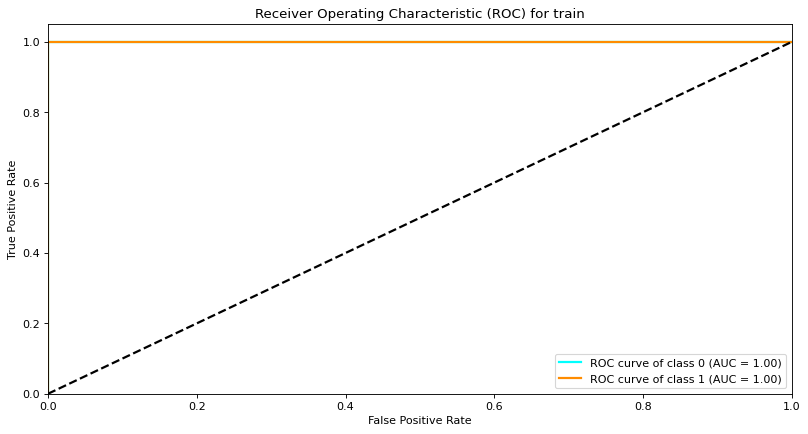

In [132]:
# ROC Curve and AUC
# Binarize the output

y_train_binarized = label_binarize(y_train_pca, classes=[0, 1, 2])
x_pred_binarized = label_binarize(x_pred_DT_pca, classes=[0, 1, 2])
n_classes = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_train_binarized[:, i], x_pred_binarized[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(12, 6), dpi=80)
lw = 2
colors = ["aqua", "darkorange"]
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (AUC = {1:0.2f})".format(i, roc_auc[i])
    )

plt.plot([0, 1], [0, 1], color="black", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) for train")
plt.legend(loc="lower right")
plt.show()

#### Test

Classifier: Decision Tree
accuracy_DT_pca: 0.9995555555555555
precision_DT_pca: 0.9995003331112592
recall_DT_pca: 0.999611327040533
F1-score with DecisionTree: 0.9996
Confusion Matrix:
 [[17981     9]
 [    7 18003]]


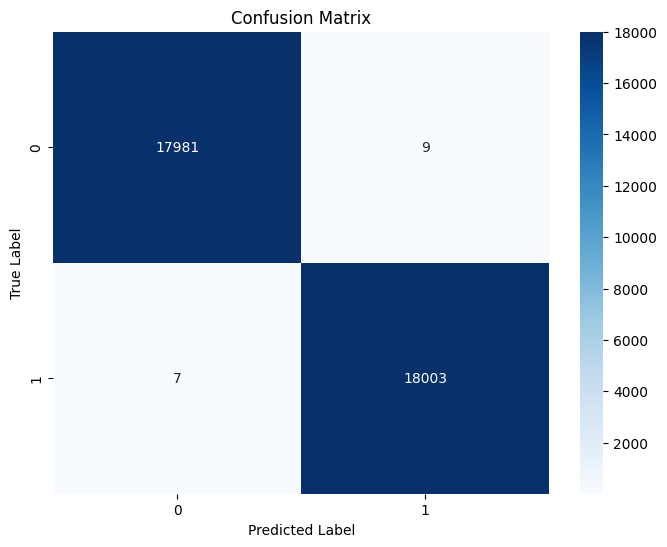

In [133]:
print(f"Classifier: Decision Tree")

# Calculate accuracy, precision and recall
accuracy_DT_pca = accuracy_score(y_test_pca, y_pred_DT_pca)
precision_DT_pca = precision_score(y_test_pca, y_pred_DT_pca)
recall_DT_pca = recall_score(y_test_pca, y_pred_DT_pca)

# Print the results
print("accuracy_DT_pca:", accuracy_DT_pca)
print("precision_DT_pca:", precision_DT_pca)
print("recall_DT_pca:", recall_DT_pca)
# Calculate F1-score
f1_score_DT_pca = f1_score(y_test_pca, y_pred_DT_pca)
# Print the F1-score
print(f"F1-score with DecisionTree: {f1_score_DT_pca:.4f}")
# Create the confusion matrix
cm_pca = confusion_matrix(y_test_pca, y_pred_DT_pca)
print("Confusion Matrix:\n", cm_pca)
# Tracer la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm_pca, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

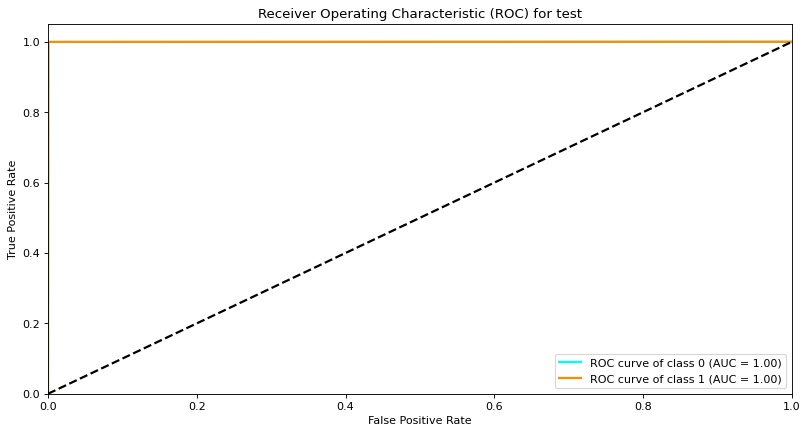

In [134]:
# ROC Curve and AUC
# Binarize the output

y_test_binarized = label_binarize(y_test_pca, classes=[0, 1, 2])
y_pred_binarized = label_binarize(y_pred_DT_pca, classes=[0, 1, 2])
n_classes = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_binarized[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(12, 6), dpi=80)
lw = 2
colors = ["aqua", "darkorange"]
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (AUC = {1:0.2f})".format(i, roc_auc[i])
    )

plt.plot([0, 1], [0, 1], color="black", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) for test")
plt.legend(loc="lower right")
plt.show()

#### Feature Importance

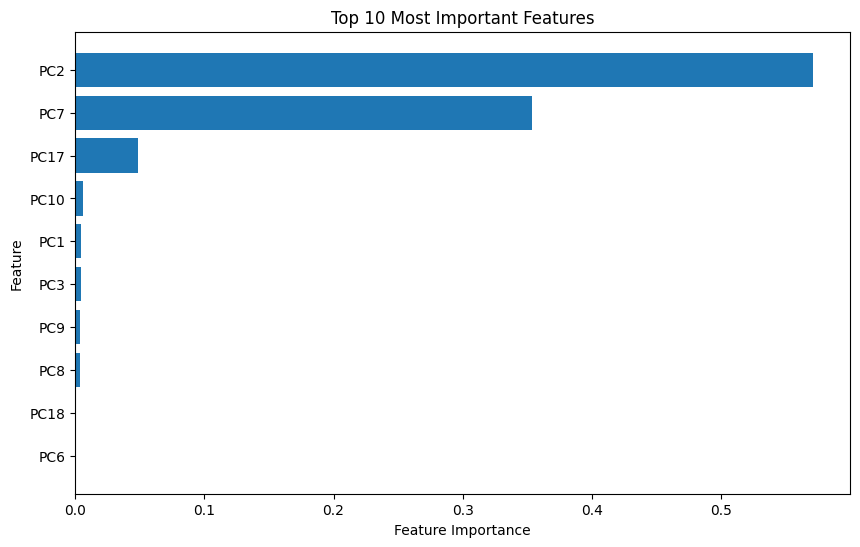

In [135]:
# Get feature importances from the Decision Tree model
feature_importances = dt_model_pca.feature_importances_
# Get the corresponding feature names
feature_names = df_pca.drop('Label', axis=1).columns

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the top N most important features (e.g., top 10)
top_n = 10
plt.figure(figsize=(10, 6))
plt.barh(range(top_n), feature_importance_df['Importance'][:top_n], align='center')
plt.yticks(range(top_n), feature_importance_df['Feature'][:top_n])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top {} Most Important Features'.format(top_n))
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important feature at the top
plt.show()

## Cross Validations

In [136]:
# Define a list of classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
}

# Set up cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

### Pca

In [137]:
for name, classifier in classifiers.items():
    scores = cross_val_score(classifier, X_pca, y_pca, cv=cv, scoring='accuracy')
    
    print(f"Classifier: {name}")
    print(f"Mean Accuracy: {scores.mean():.2f}")
    print(f"Accuracy Std Dev: {scores.std():.2f}")
    print(f"Accuracy Scores: {scores}\n")

Classifier: Logistic Regression
Mean Accuracy: 1.00
Accuracy Std Dev: 0.00
Accuracy Scores: [0.99916667 0.99905556 0.99883333 0.999      0.99922222 0.99894444
 0.99888889 0.99883333 0.99922222 0.99888889]

Classifier: Support Vector Machine
Mean Accuracy: 1.00
Accuracy Std Dev: 0.00
Accuracy Scores: [0.99938889 0.99944444 0.99933333 0.99927778 0.99927778 0.99938889
 0.99927778 0.99911111 0.99922222 0.9995    ]

Classifier: K-Nearest Neighbors
Mean Accuracy: 1.00
Accuracy Std Dev: 0.00
Accuracy Scores: [0.99988889 0.99983333 0.99994444 0.99988889 0.99983333 0.99994444
 0.99977778 0.99977778 0.99977778 0.99977778]

Classifier: Decision Tree
Mean Accuracy: 1.00
Accuracy Std Dev: 0.00
Accuracy Scores: [0.99972222 0.99972222 0.9995     0.99966667 0.99977778 0.99955556
 0.99961111 0.99988889 0.9995     0.9995    ]



## Modeller arası doğruluk karşılaştırılması

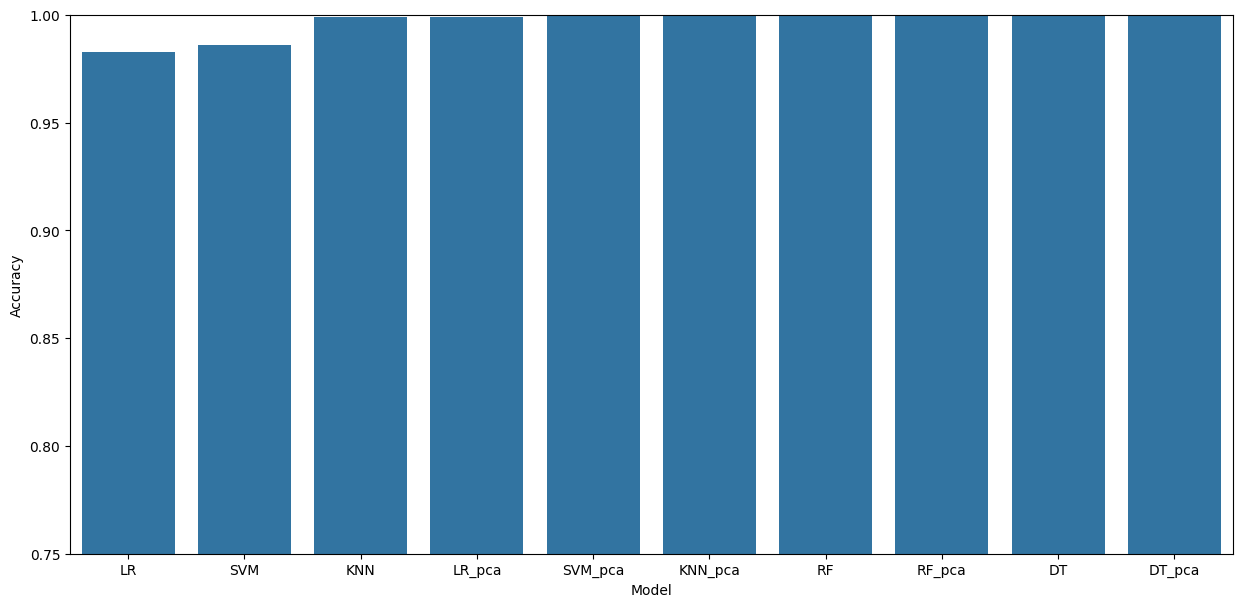

In [138]:
accuracy_RF = 1.0
accuracy_RF = 1.0

accuracy_LR = 0.9829
accuracy_LR_pca = 0.9989

accuracy_SVM = 0.9861
accuracy_SVM_pca = 0.9993

accuracy_KNN = 0.9988
accuracy_KNN_pca = 0.9999

accuracy_DT = 1.0
accuracy_DT_pca = 1.0


x=['RF', 'RF_pca', 'LR', 'LR_pca', 'SVM', 'SVM_pca', 'KNN', 'KNN_pca', 'DT', 'DT_pca']
y=[accuracy_RF, accuracy_RF, accuracy_LR, accuracy_LR_pca, accuracy_SVM, accuracy_SVM_pca, accuracy_KNN, accuracy_KNN_pca, accuracy_DT, accuracy_DT_pca]

accuracies = {
    label: accuracy for label, accuracy in zip(x, y)
}
accuracies = {k: v for k, v in sorted(accuracies.items(), key=lambda item: item[1])}

plt.figure(figsize=(15, 7))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.75, 1)
plt.show()

## Rastgele Test girdileri ile prediction

In [141]:
# Train each model and perform predictions on a random test sample
i = 0
n_samples = 100
for name, model in models.items():
    correct_predictions = 0
    if (i % 2 == 0):
        dataset= X_test
        testset = y_test
    else:
        dataset = np.array(X_test_pca)
        testset = np.array(y_test_pca)

   
    random_indices = np.random.choice(len(dataset), size=n_samples, replace=False) 

    random_test_samples = dataset[random_indices]
    true_classes = testset[random_indices]
    # Perform prediction on the random sample
    predicted_classes = model.predict(random_test_samples)
    
    # Calculate the number of correct predictions
    correct_predictions = np.sum(predicted_classes == true_classes)
    # Display the prediction and the true class
    
    """for idx, random_index in enumerate(random_indices):
        print(f"{name} Model - Random Index {random_index}:")
        print(f"Random Test Sample Prediction: {predicted_classes[idx]}")
        print(f"Actual Class: {true_classes[idx]}\n")"""

    i = i+1
    accuracy = correct_predictions / n_samples
    print(f"{name} Model Accuracy for {n_samples} Random Samples: {accuracy * 100:.2f}%\n")


Random Forest Model Accuracy for 100 Random Samples: 100.00%

Random Forest PCA Model Accuracy for 100 Random Samples: 100.00%

Logistic Regression Model Accuracy for 100 Random Samples: 99.00%

Logistic Regression PCA Model Accuracy for 100 Random Samples: 100.00%

SVM Model Accuracy for 100 Random Samples: 97.00%

SVM PCA Model Accuracy for 100 Random Samples: 100.00%

K-Nearest Neighbors Model Accuracy for 100 Random Samples: 100.00%

K-Nearest Neighbors PCA Model Accuracy for 100 Random Samples: 100.00%

Decision Tree Model Accuracy for 100 Random Samples: 100.00%

Decision Tree PCA Model Accuracy for 100 Random Samples: 100.00%



C:\Users\burak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\burak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\burak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\burak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning